why scaling data?
Neural networks often perform better when their input data is on a consistent scale. This is because most common activation functions of the network’s neurons such as tanh or sigmoid are defined on the [-1, 1] or [0, 1] range respectively.

Gradient descent converges faster when the features are on a similar scale.

 Scaling ensures that all features have equal importance and no particular feature(s) dominates others just because of their scale.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def train_and_evaluate(function, hidden_layers, max_iter,datapoints_number,start=-2 * np.pi,end= 2 * np.pi, test_size=0.2):
    # Generate the data
    df = pd.DataFrame()
    df['x'] = np.random.uniform(start,end, size=datapoints_number)
    df['y'] = df['x'].apply(function)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=test_size)

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=max_iter)
    mlp.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = mlp.predict(X_test_scaled)
    print()
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    # Plot the function and the predicted points
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    y = function(x)
    plt.plot(x, y, label='Function')
    plt.scatter(X_test, predictions, color='red', label='Predicted Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and Predicted Points')
    plt.legend()
    plt.show()



**add noise to data points:**

 Autoencoders can be trained to reconstruct the input data, and during this process, they can learn to ignore noise in the input data, effectively acting as a noise filter.

Another approach is to use a Bayesian Neural Network. These networks model uncertainty and can be more robust to noise. They provide a distribution of possible output values instead of a single value, which can be beneficial when dealing with noisy data.

تمام تسک های بخش اول در دو تابع  خلاصه شده. یکی تابع train_and_evaluate که میتوان ورودی های مختلفی متابق کد به آن داد و دیگری تابع train_and_evaluate_noisy که میتوان مقادیر مختلف نویز را به آن اضافه کرد که تاثیر آن بر شبکه عصبی و اینکه چه شبکه ای چه مقدار نویز را بی اثر میکند دید.

Bayesian Neural Networks (BNNs) extend standard networks with posterior inference to control overfitting. They utilize probabilistic layers that capture uncertainty over weights and activations, and are trained using Bayesian inference2. The Bayesian approach uses the statistical methodology so that everything, including model parameters (weights and biases in neural networks), has a probability distribution attached to it.
The architecture of a Bayesian neural network can vary, but a simple example might include an input layer, one or more hidden layers, and an output layer. Each of these layers is associated with a set of weights and biases, which are treated as random variables with their own prior distributions. During training, the network learns the posterior distribution of these weights and biases given the data.

Autoencoders are a specialized class of algorithms that can learn efficient representations of input data without the need for labels5. They are designed for unsupervised learning. An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation.

The general architecture of an autoencoder includes an encoder, a bottleneck layer, and a decoder:

Encoder: The encoder takes raw input data and the hidden layers progressively reduce the dimensionality of the input, capturing important features and patterns.
Bottleneck Layer: This is the final hidden layer, where the dimensionality is significantly reduced. This layer represents the compressed encoding of the input data.
Decoder: The decoder takes the encoded representation and expands it back to the dimensionality of the original input. The hidden layers progressively increase the dimensionality and aim to reconstruct the original input.
The loss function used during training is typically a reconstruction loss, measuring the difference between the input and the reconstructed output. Common choices include mean squared error (MSE) for continuous data or binary cross-entropy for binary data.


In [184]:
def train_and_evaluate_noisy(function, hidden_layers=(1,128,8,128,1), max_iter=30, datapoints_number=1000, noise_rate=0.5, start=-2 * np.pi, end= 2 * np.pi, test_size=0.2):
    # Generate the data
    df = pd.DataFrame()
    df['x'] = np.random.uniform(start, end, size=datapoints_number)
    df['y'] = df['x'].apply(function)

    # Add noise to the data
    noise = np.random.normal(0, noise_rate, size=datapoints_number)
    df['y'] += noise

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=test_size)

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=max_iter)
    mlp.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = mlp.predict(X_test_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    # Plot the function and the predicted points
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    y = function(x)
    plt.plot(x, y, label='Function')
    plt.scatter(X_test, predictions, color='red', label='Predicted Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and Predicted Points')
    plt.legend()
    plt.show()


In [ ]:
# Define the parameters I want to change
hidden_layers_list = [(100,), (50,), (25, 25), (10, 10, 10, 10 ),(2,3,5,2,3)]
max_iter_list = [4,20,100,200,500, 1000, 2000]
datapoints_number_list = [20,100,500,600,1000, 2000, 3000]
interval=[(0,1),(-1,1),(-2 * np.pi,2 * np.pi),(0,100),(-10,10)]


# function: sin(x)

Training with hidden_layers=(100,), max_iter=4, datapoints_number=20, interval=(0,1)

Mean Squared Error: 0.38768831681696064


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


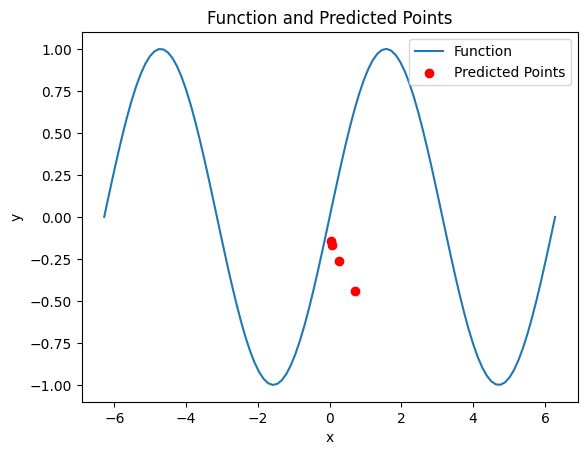

Training with hidden_layers=(100,), max_iter=4, datapoints_number=20, interval=(-1,1)

Mean Squared Error: 0.25438094756496377


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


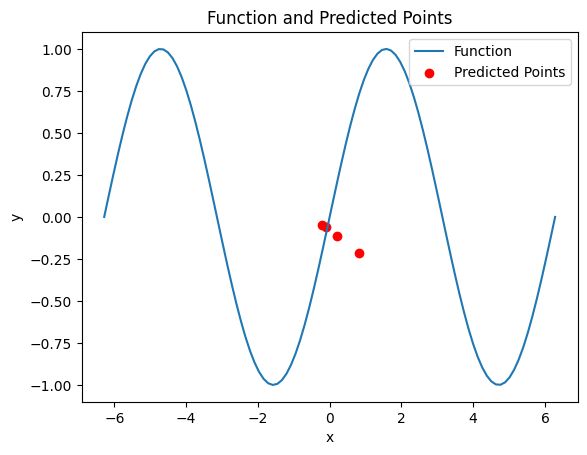

Training with hidden_layers=(100,), max_iter=4, datapoints_number=20, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.6150590023825588


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


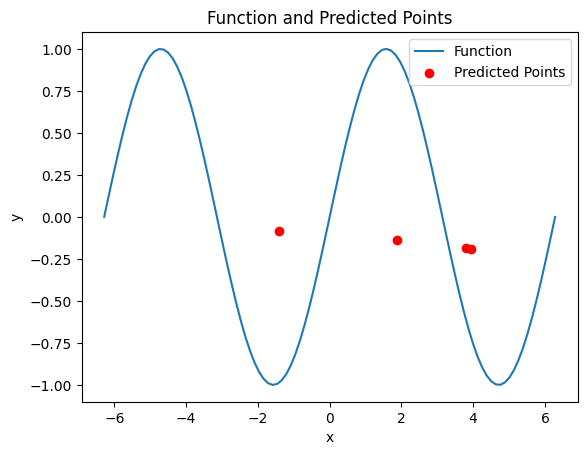

Training with hidden_layers=(100,), max_iter=4, datapoints_number=20, interval=(0,100)

Mean Squared Error: 0.3603833285992182


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


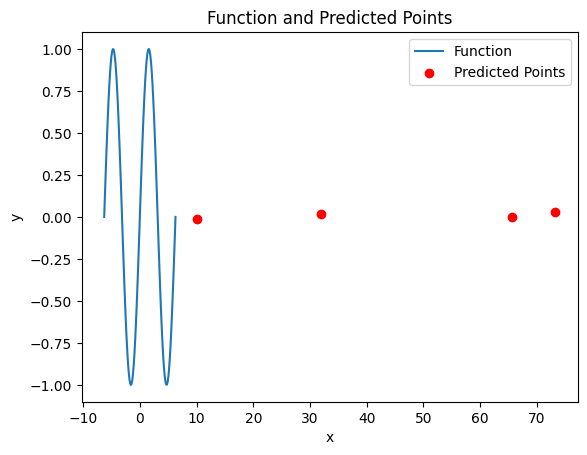

Training with hidden_layers=(100,), max_iter=4, datapoints_number=20, interval=(-10,10)

Mean Squared Error: 0.6477662305772174


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


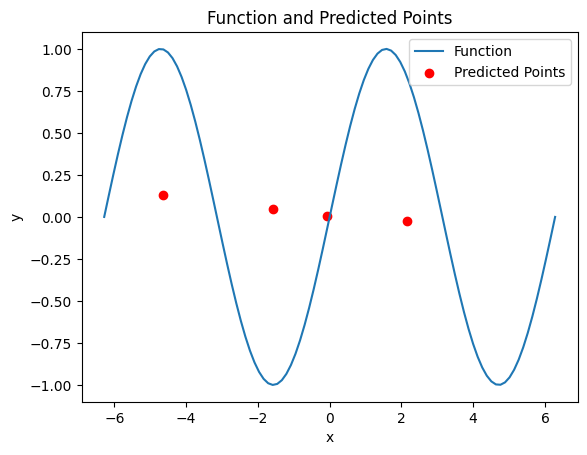

Training with hidden_layers=(100,), max_iter=4, datapoints_number=100, interval=(0,1)

Mean Squared Error: 0.3988377383026079


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


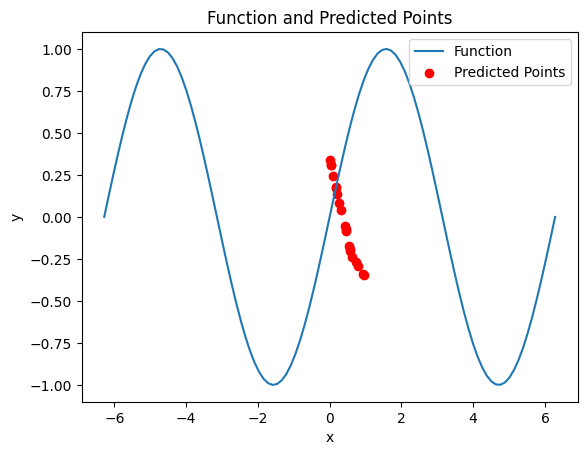

Training with hidden_layers=(100,), max_iter=4, datapoints_number=100, interval=(-1,1)

Mean Squared Error: 0.2011929698958625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


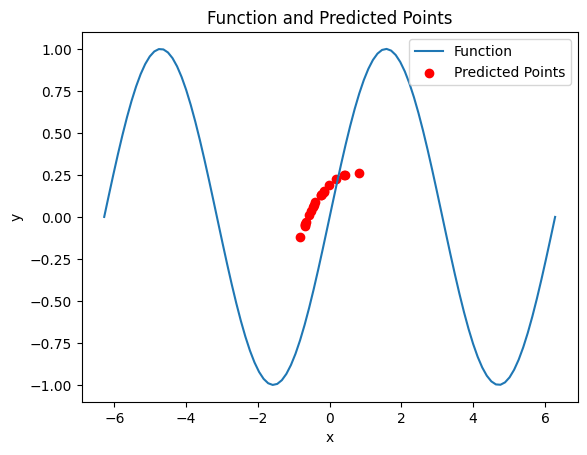

Training with hidden_layers=(100,), max_iter=4, datapoints_number=100, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.33932972100995956


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


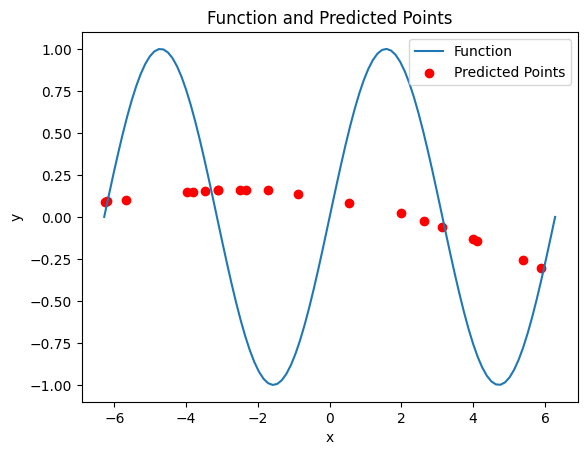

Training with hidden_layers=(100,), max_iter=4, datapoints_number=100, interval=(0,100)

Mean Squared Error: 0.5622855469654565


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


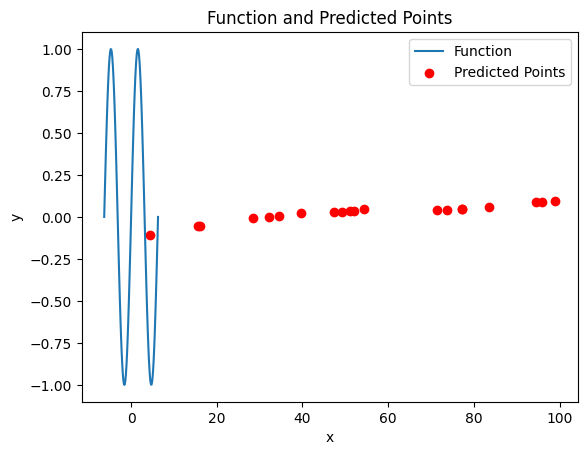

Training with hidden_layers=(100,), max_iter=4, datapoints_number=100, interval=(-10,10)

Mean Squared Error: 0.48315616573396863


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


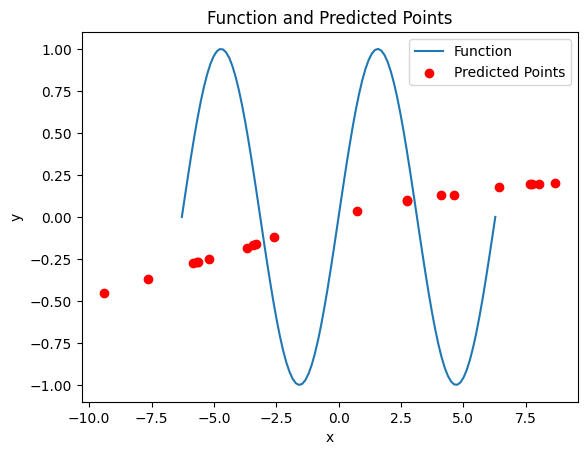

Training with hidden_layers=(100,), max_iter=4, datapoints_number=500, interval=(0,1)

Mean Squared Error: 0.5443693016839982


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


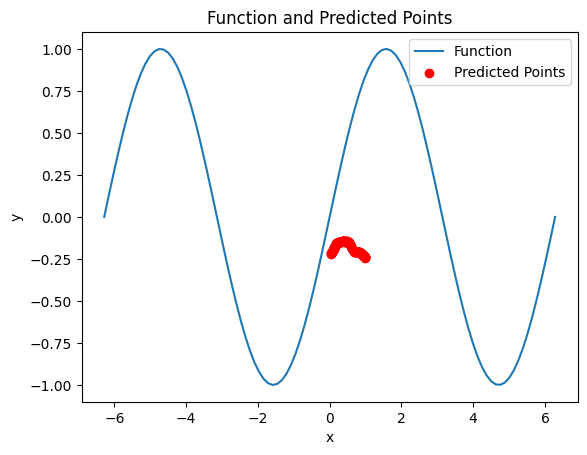

Training with hidden_layers=(100,), max_iter=4, datapoints_number=500, interval=(-1,1)

Mean Squared Error: 0.2697035441072084


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


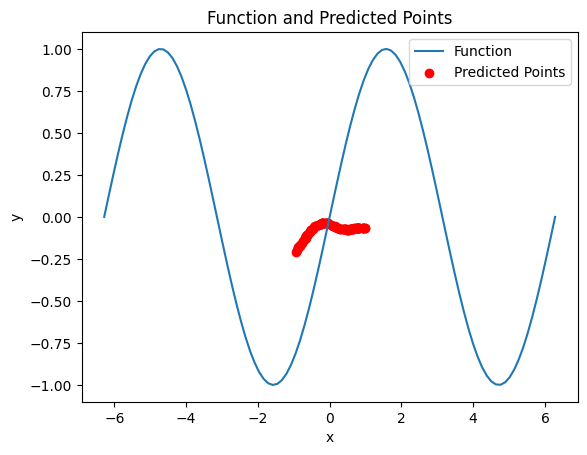

Training with hidden_layers=(100,), max_iter=4, datapoints_number=500, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.4936538747410807


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


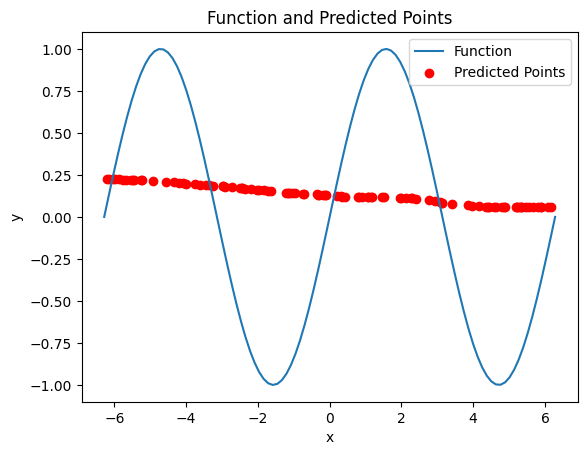

Training with hidden_layers=(100,), max_iter=4, datapoints_number=500, interval=(0,100)

Mean Squared Error: 0.4579469676393622


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


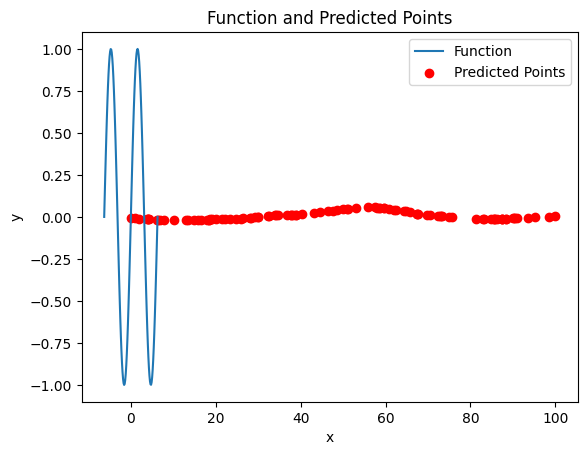

Training with hidden_layers=(100,), max_iter=4, datapoints_number=500, interval=(-10,10)

Mean Squared Error: 0.460713204146928


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


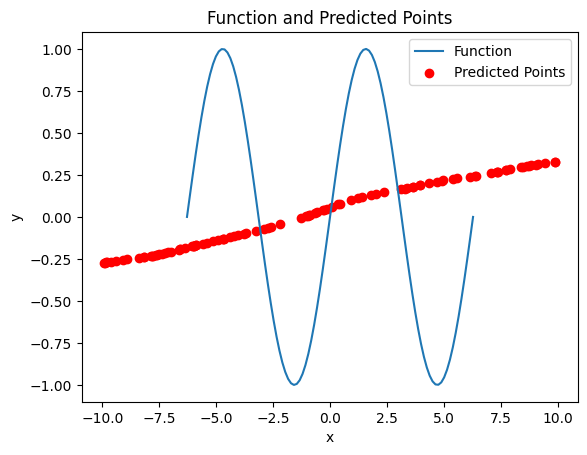

Training with hidden_layers=(100,), max_iter=4, datapoints_number=600, interval=(0,1)

Mean Squared Error: 0.07465651915411481


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


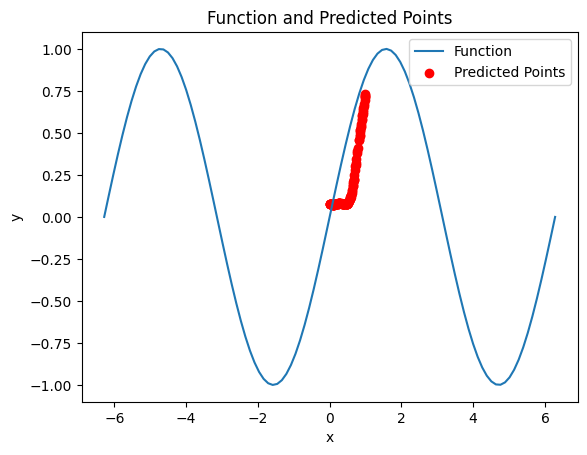

Training with hidden_layers=(100,), max_iter=4, datapoints_number=600, interval=(-1,1)

Mean Squared Error: 0.08089112854380423


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


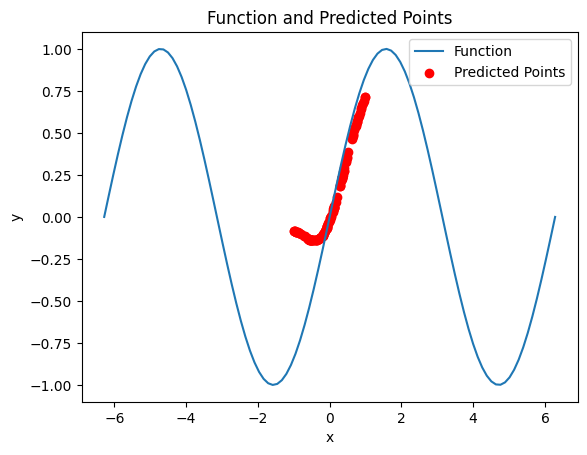

Training with hidden_layers=(100,), max_iter=4, datapoints_number=600, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.44533536780315186


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


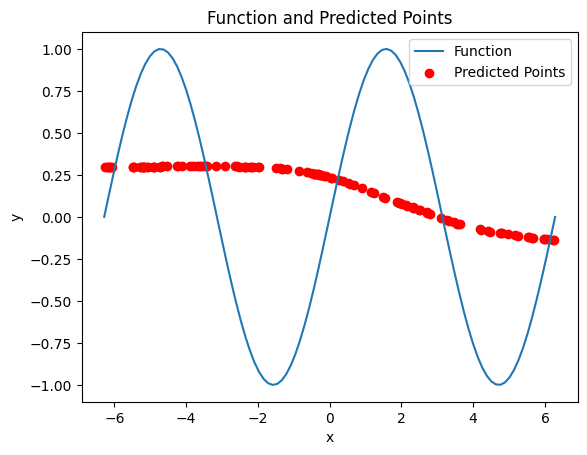

Training with hidden_layers=(100,), max_iter=4, datapoints_number=600, interval=(0,100)

Mean Squared Error: 0.5610211358467448


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


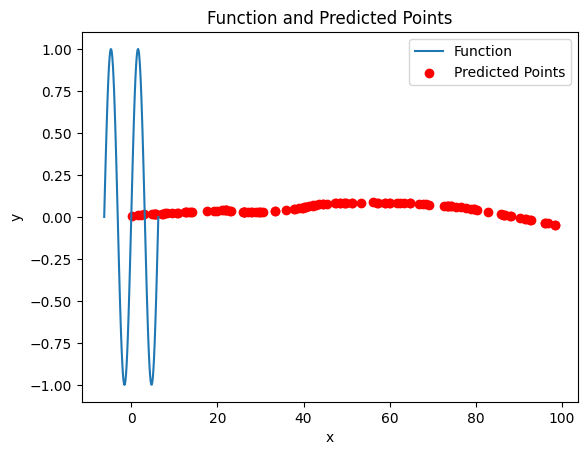

Training with hidden_layers=(100,), max_iter=4, datapoints_number=600, interval=(-10,10)

Mean Squared Error: 0.4467671383760628


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


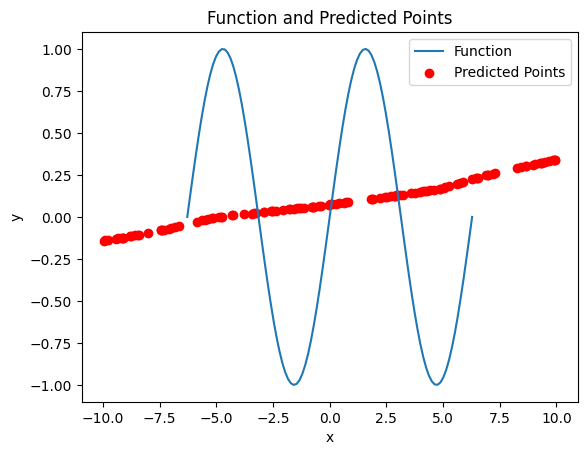

Training with hidden_layers=(100,), max_iter=4, datapoints_number=1000, interval=(0,1)

Mean Squared Error: 0.16111495013480784


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


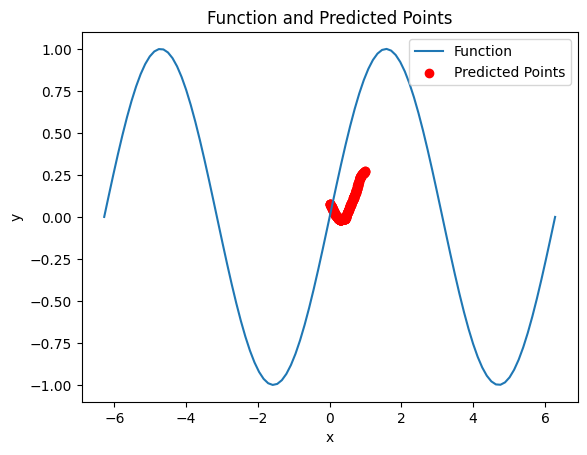

Training with hidden_layers=(100,), max_iter=4, datapoints_number=1000, interval=(-1,1)

Mean Squared Error: 0.005568185520468608


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


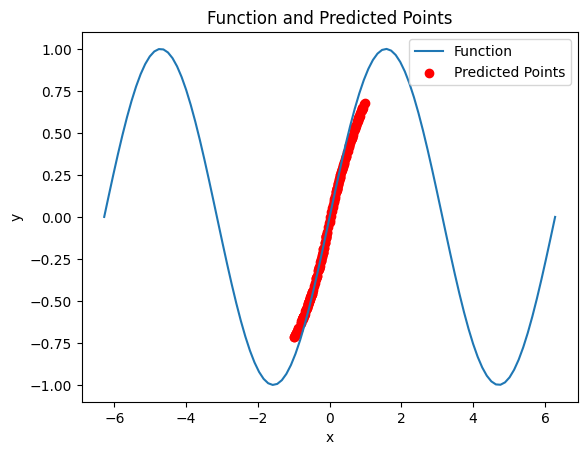

Training with hidden_layers=(100,), max_iter=4, datapoints_number=1000, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.43951809401321723


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


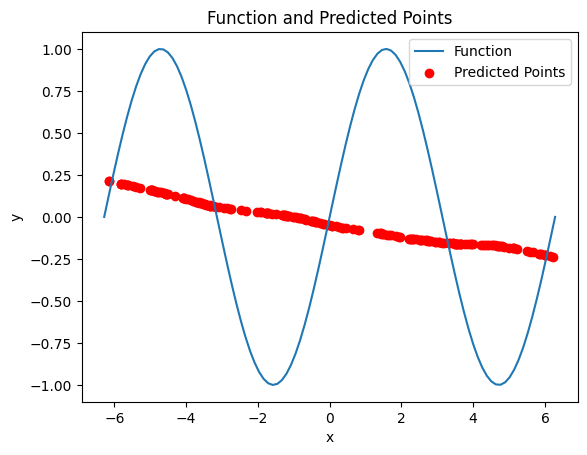

Training with hidden_layers=(100,), max_iter=4, datapoints_number=1000, interval=(0,100)

Mean Squared Error: 0.5367689439732564


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


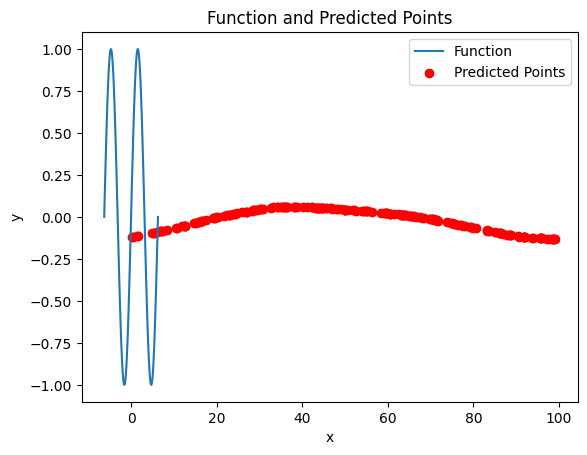

Training with hidden_layers=(100,), max_iter=4, datapoints_number=1000, interval=(-10,10)

Mean Squared Error: 0.4805174713866755


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


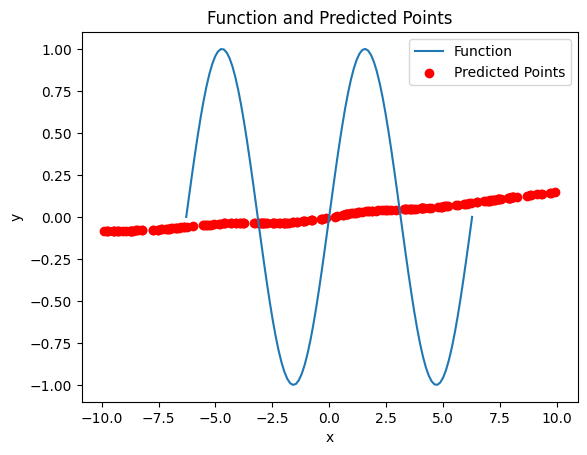

Training with hidden_layers=(100,), max_iter=4, datapoints_number=2000, interval=(0,1)

Mean Squared Error: 0.07484407816851618


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


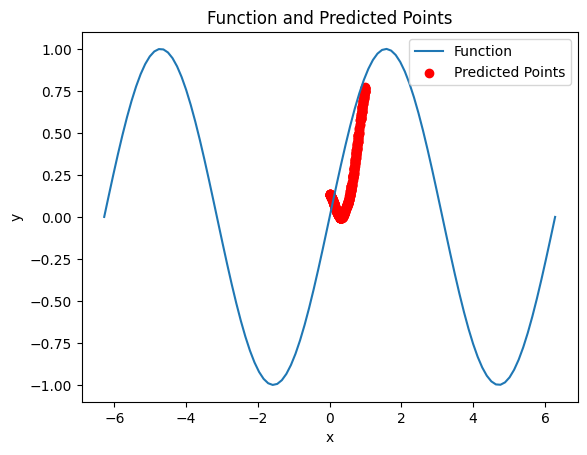

Training with hidden_layers=(100,), max_iter=4, datapoints_number=2000, interval=(-1,1)

Mean Squared Error: 0.08764676576775182


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


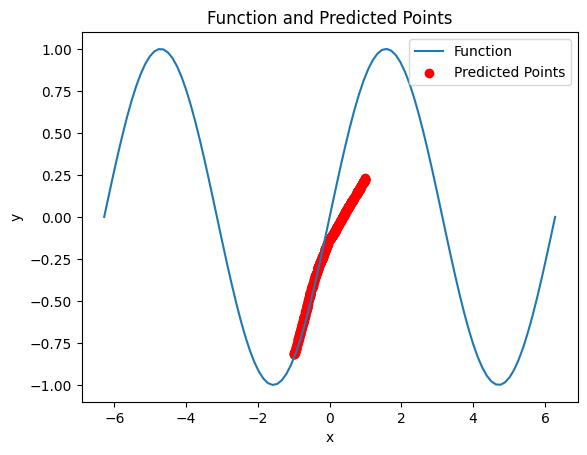

Training with hidden_layers=(100,), max_iter=4, datapoints_number=2000, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.3768266071401491


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


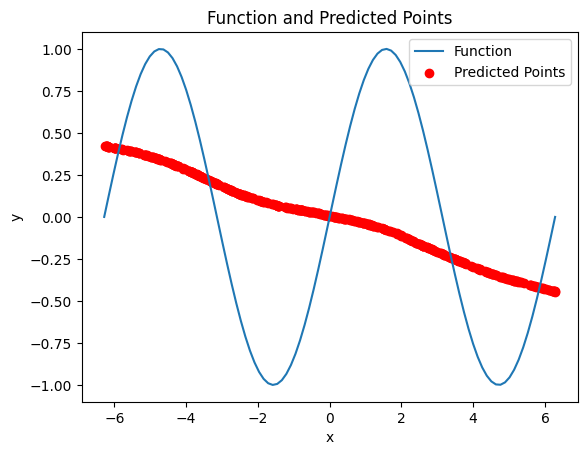

Training with hidden_layers=(100,), max_iter=4, datapoints_number=2000, interval=(0,100)

Mean Squared Error: 0.5107326168922457


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


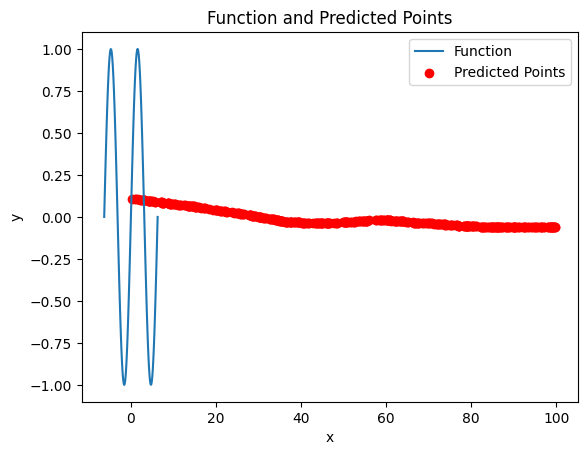

Training with hidden_layers=(100,), max_iter=4, datapoints_number=2000, interval=(-10,10)

Mean Squared Error: 0.4653251091020176


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


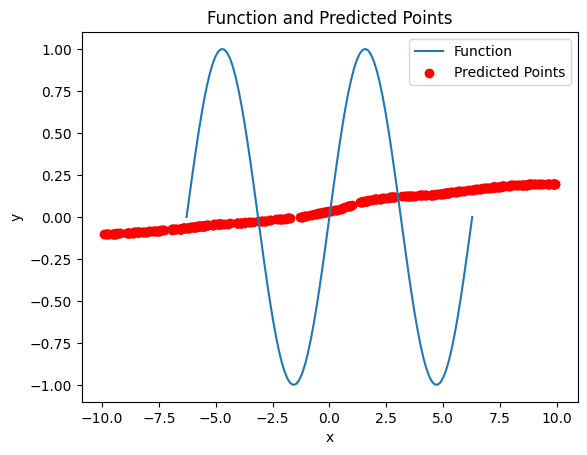

Training with hidden_layers=(100,), max_iter=4, datapoints_number=3000, interval=(0,1)

Mean Squared Error: 0.004647094166965871


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


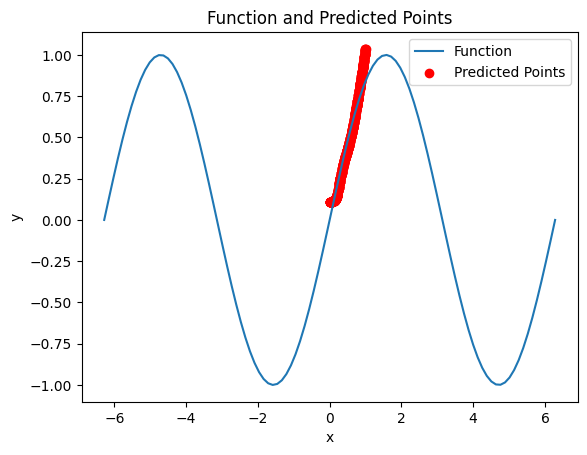

Training with hidden_layers=(100,), max_iter=4, datapoints_number=3000, interval=(-1,1)

Mean Squared Error: 0.0013421495531036512


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


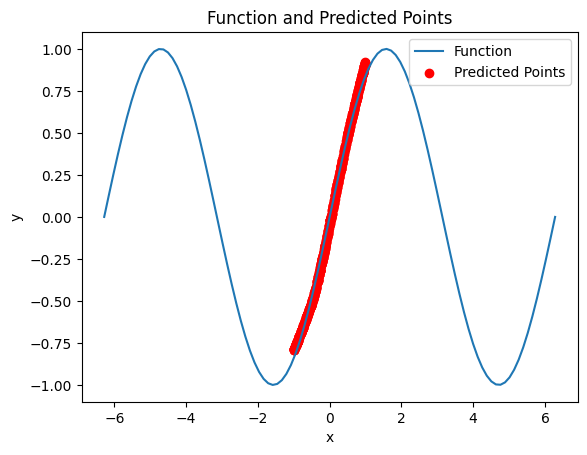

Training with hidden_layers=(100,), max_iter=4, datapoints_number=3000, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.4116110062127328


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


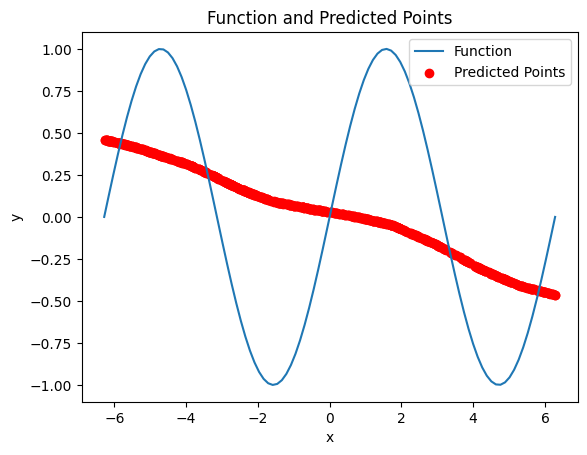

Training with hidden_layers=(100,), max_iter=4, datapoints_number=3000, interval=(0,100)

Mean Squared Error: 0.4778599881668263


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


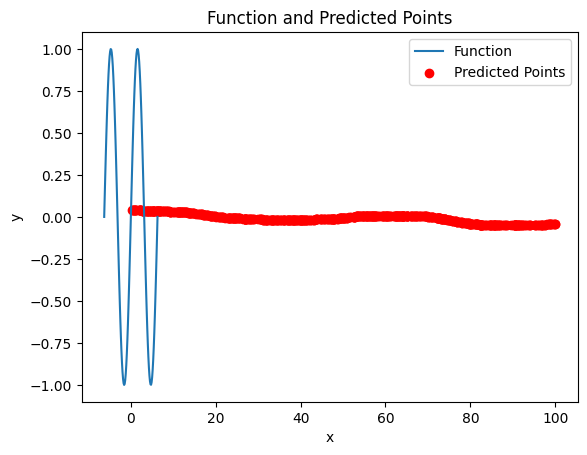

Training with hidden_layers=(100,), max_iter=4, datapoints_number=3000, interval=(-10,10)

Mean Squared Error: 0.40256922458513017


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


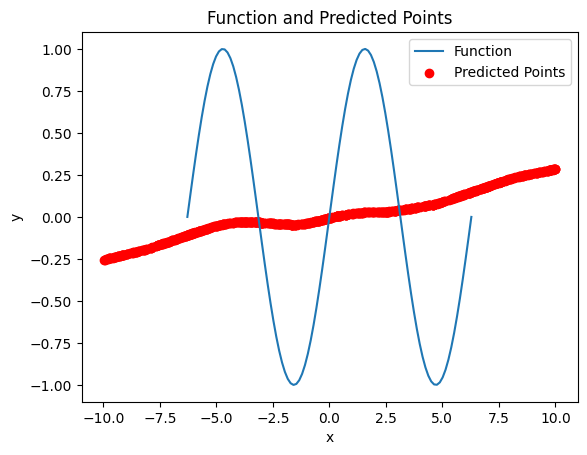

Training with hidden_layers=(100,), max_iter=20, datapoints_number=20, interval=(0,1)

Mean Squared Error: 0.006266015542500014


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


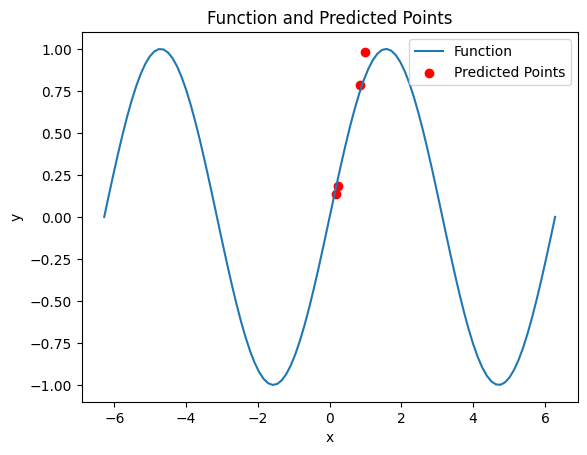

Training with hidden_layers=(100,), max_iter=20, datapoints_number=20, interval=(-1,1)

Mean Squared Error: 0.17196560847991704


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


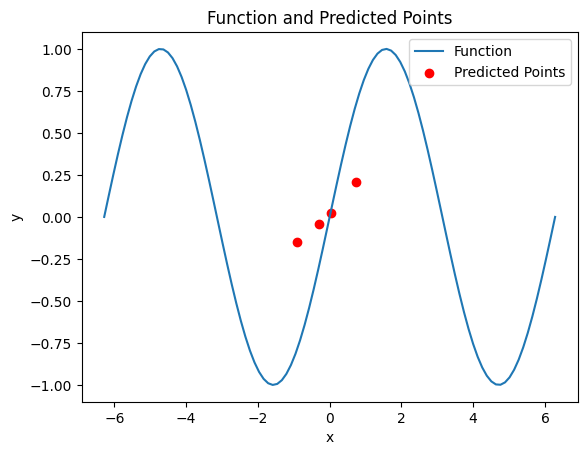

Training with hidden_layers=(100,), max_iter=20, datapoints_number=20, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.21605068282011472


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


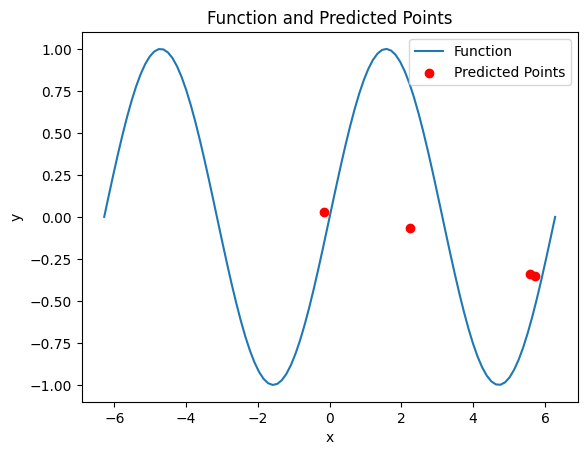

Training with hidden_layers=(100,), max_iter=20, datapoints_number=20, interval=(0,100)

Mean Squared Error: 0.36790723822030824


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


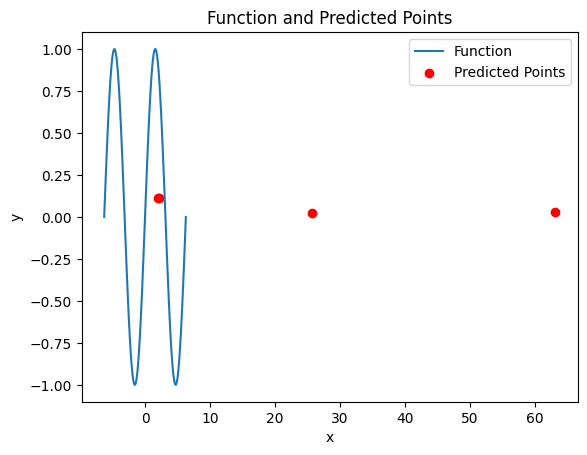

Training with hidden_layers=(100,), max_iter=20, datapoints_number=20, interval=(-10,10)

Mean Squared Error: 0.5463507077707855


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


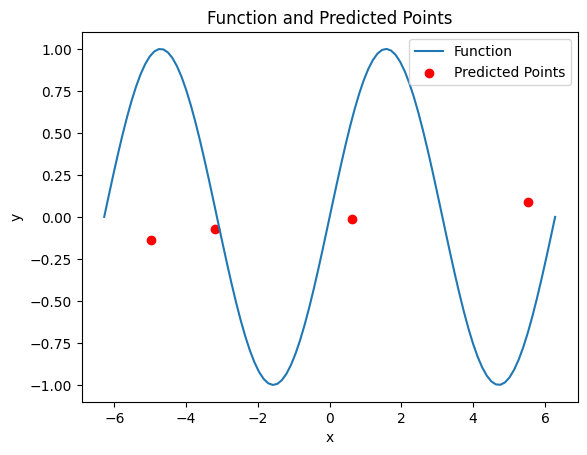

Training with hidden_layers=(100,), max_iter=20, datapoints_number=100, interval=(0,1)

Mean Squared Error: 0.10533381469362608


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


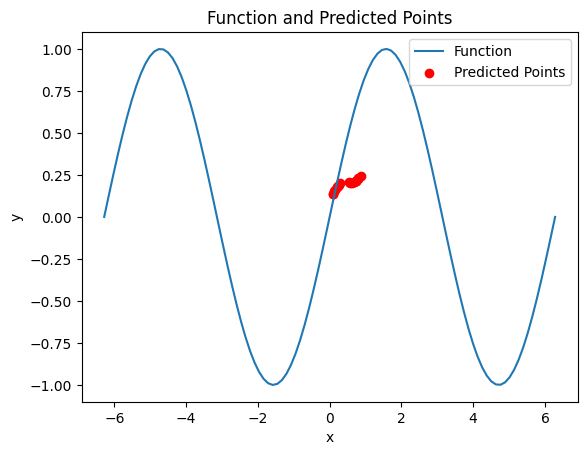

Training with hidden_layers=(100,), max_iter=20, datapoints_number=100, interval=(-1,1)

Mean Squared Error: 0.021976990551733702


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


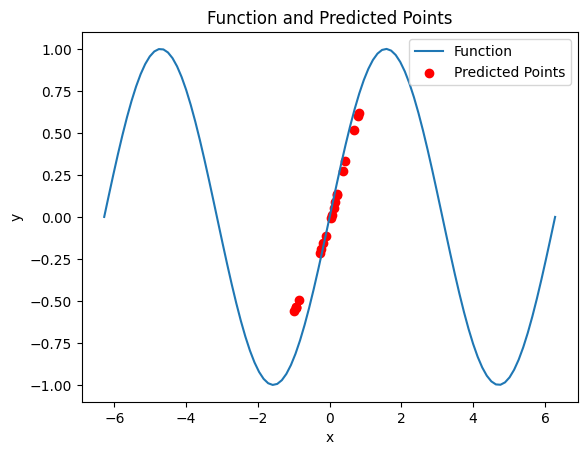

Training with hidden_layers=(100,), max_iter=20, datapoints_number=100, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.507291974489833


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


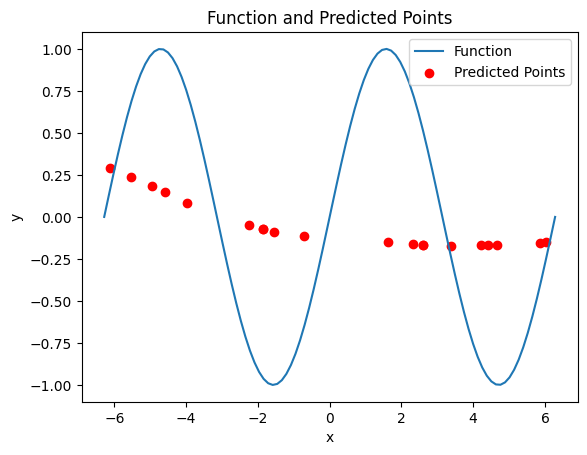

Training with hidden_layers=(100,), max_iter=20, datapoints_number=100, interval=(0,100)

Mean Squared Error: 0.615772872065282


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


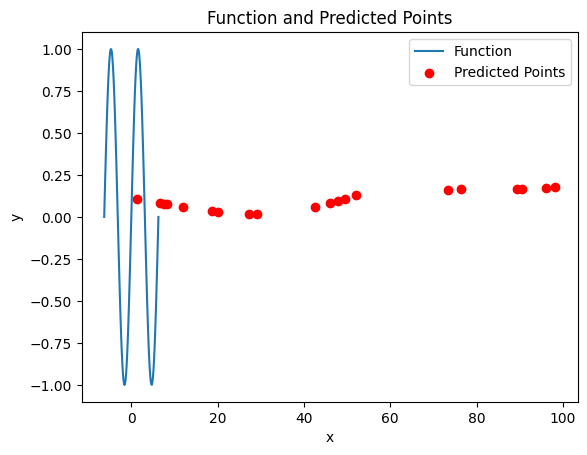

Training with hidden_layers=(100,), max_iter=20, datapoints_number=100, interval=(-10,10)

Mean Squared Error: 0.5076129087260348


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


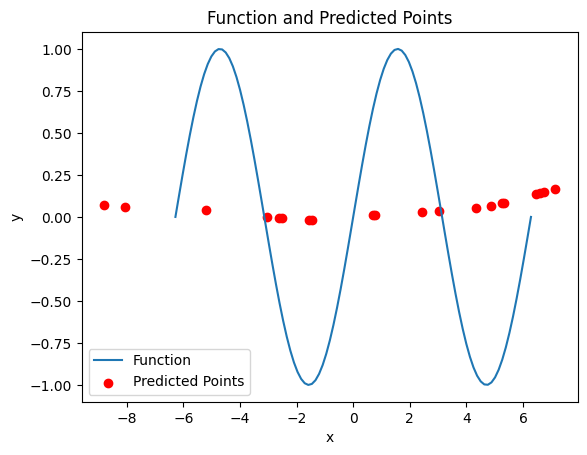

Training with hidden_layers=(100,), max_iter=20, datapoints_number=500, interval=(0,1)

Mean Squared Error: 0.0010644191199566597


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


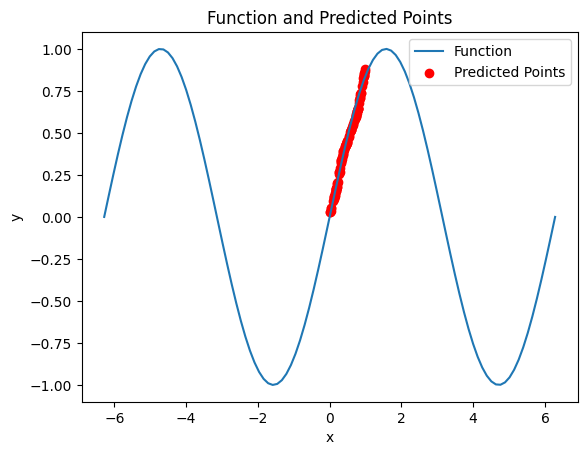

Training with hidden_layers=(100,), max_iter=20, datapoints_number=500, interval=(-1,1)

Mean Squared Error: 0.002157595600242647


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


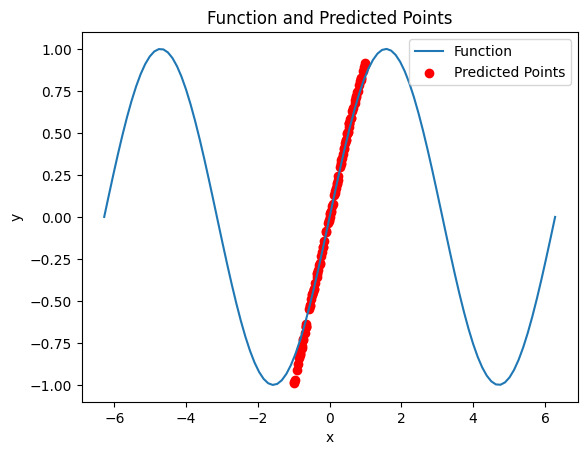

Training with hidden_layers=(100,), max_iter=20, datapoints_number=500, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.4553113719419843


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


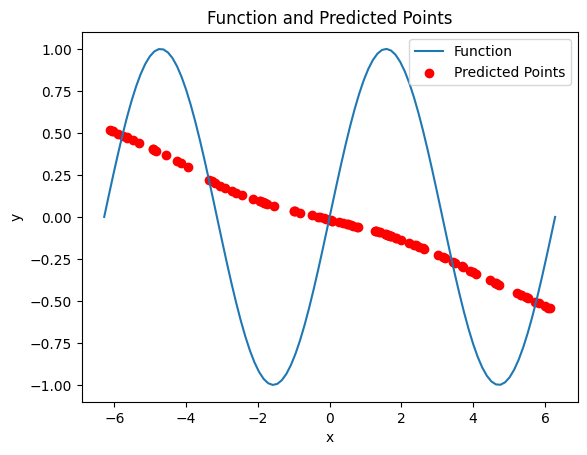

Training with hidden_layers=(100,), max_iter=20, datapoints_number=500, interval=(0,100)

Mean Squared Error: 0.47455355513522135


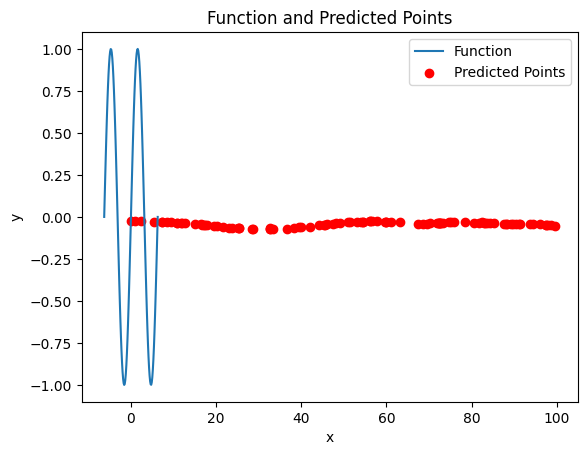

Training with hidden_layers=(100,), max_iter=20, datapoints_number=500, interval=(-10,10)

Mean Squared Error: 0.4342528441924577


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


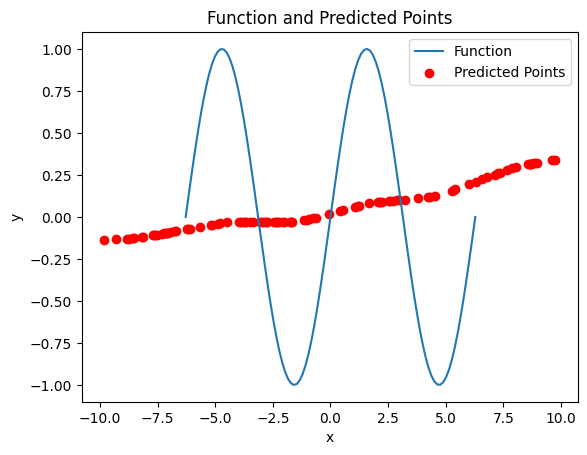

Training with hidden_layers=(100,), max_iter=20, datapoints_number=600, interval=(0,1)

Mean Squared Error: 0.0028948270188025494


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


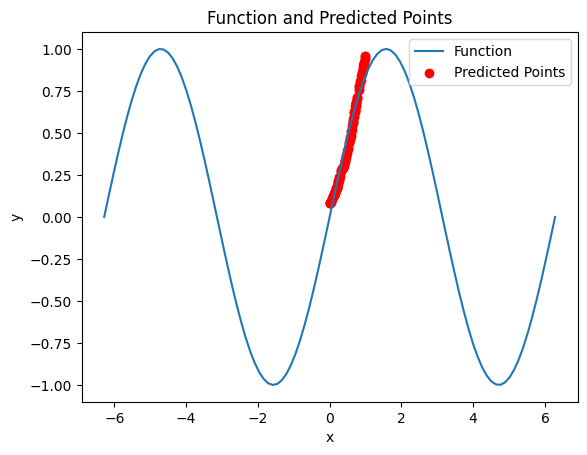

Training with hidden_layers=(100,), max_iter=20, datapoints_number=600, interval=(-1,1)

Mean Squared Error: 0.0019008861056831999


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


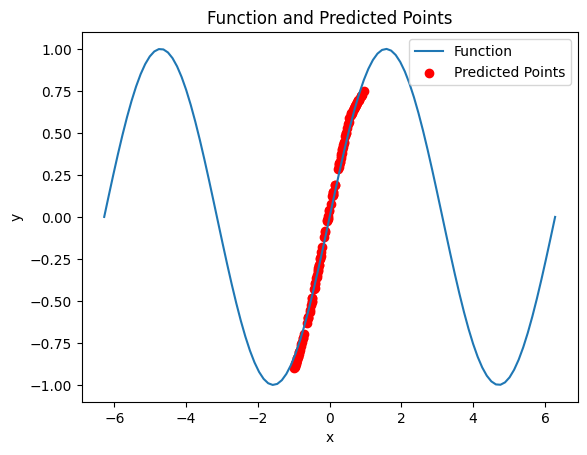

Training with hidden_layers=(100,), max_iter=20, datapoints_number=600, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.3525777980558027


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


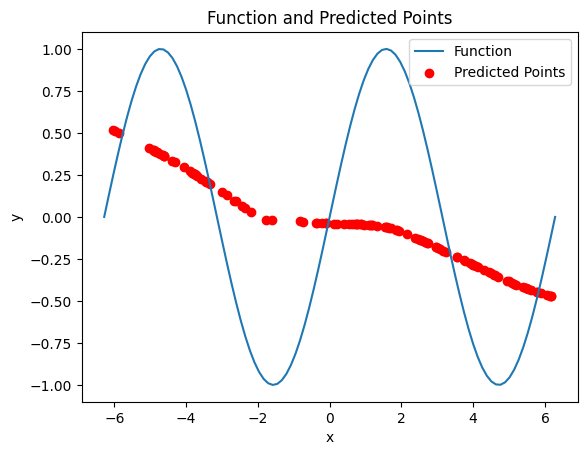

Training with hidden_layers=(100,), max_iter=20, datapoints_number=600, interval=(0,100)

Mean Squared Error: 0.5299614921243184


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


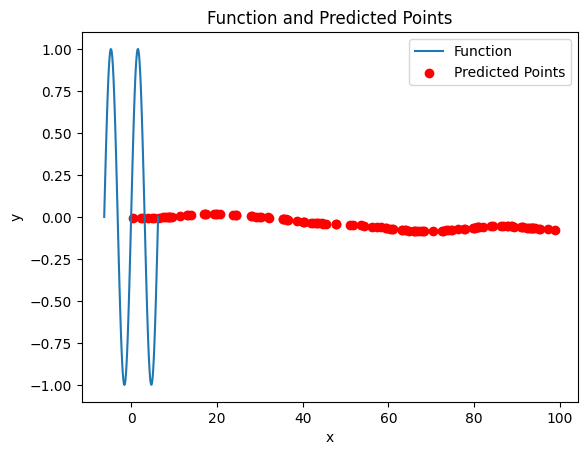

Training with hidden_layers=(100,), max_iter=20, datapoints_number=600, interval=(-10,10)

Mean Squared Error: 0.4448889897142678


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


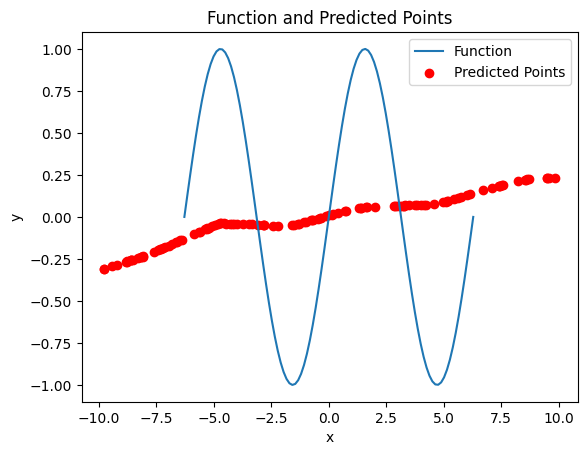

Training with hidden_layers=(100,), max_iter=20, datapoints_number=1000, interval=(0,1)

Mean Squared Error: 0.0009863528145859102


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


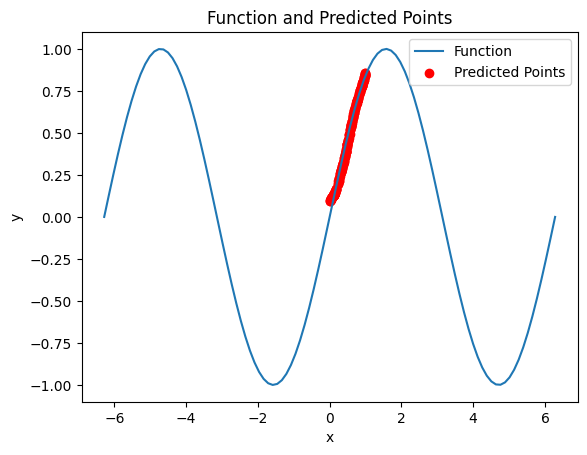

Training with hidden_layers=(100,), max_iter=20, datapoints_number=1000, interval=(-1,1)

Mean Squared Error: 0.002700540928740375


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


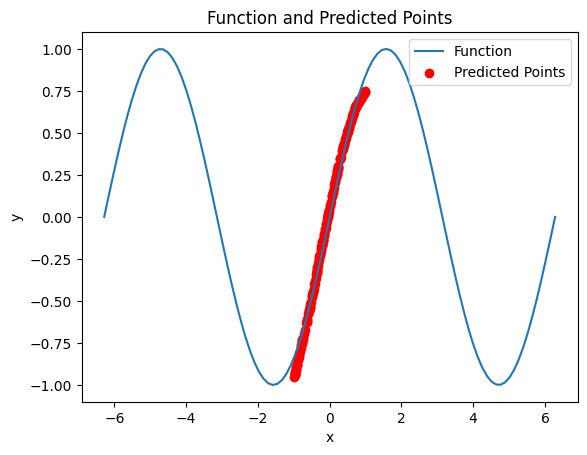

Training with hidden_layers=(100,), max_iter=20, datapoints_number=1000, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.3408938979015555


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


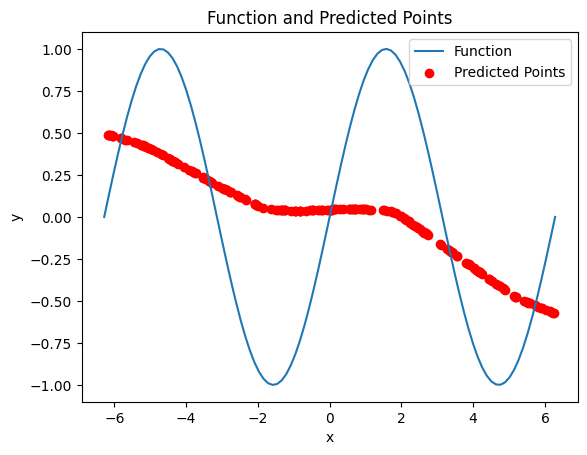

Training with hidden_layers=(100,), max_iter=20, datapoints_number=1000, interval=(0,100)

Mean Squared Error: 0.539126793895867


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


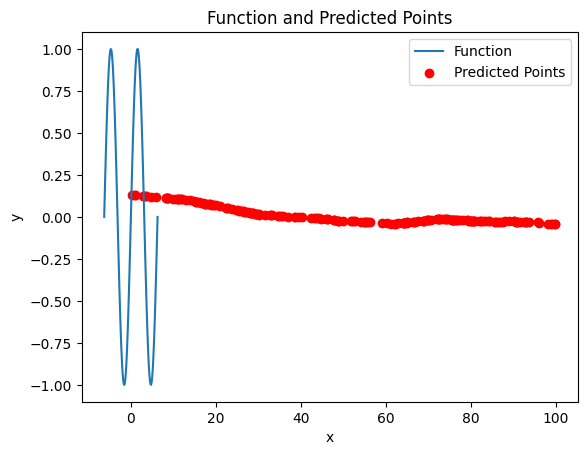

Training with hidden_layers=(100,), max_iter=20, datapoints_number=1000, interval=(-10,10)

Mean Squared Error: 0.4643269980566596


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


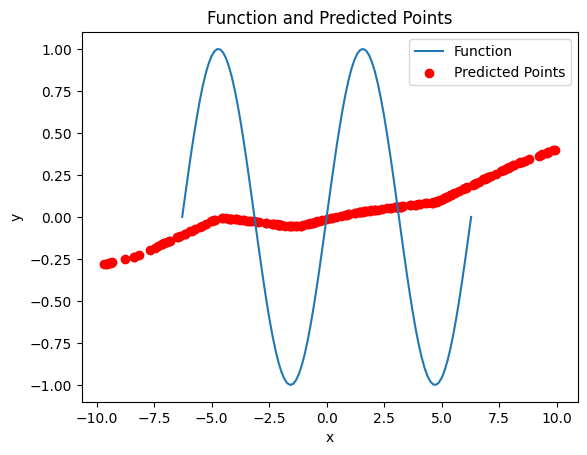

Training with hidden_layers=(100,), max_iter=20, datapoints_number=2000, interval=(0,1)

Mean Squared Error: 6.142368343888082e-05


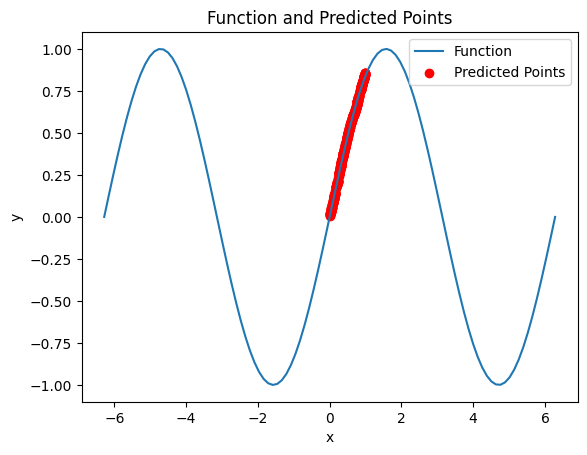

Training with hidden_layers=(100,), max_iter=20, datapoints_number=2000, interval=(-1,1)

Mean Squared Error: 0.0001788845511491708


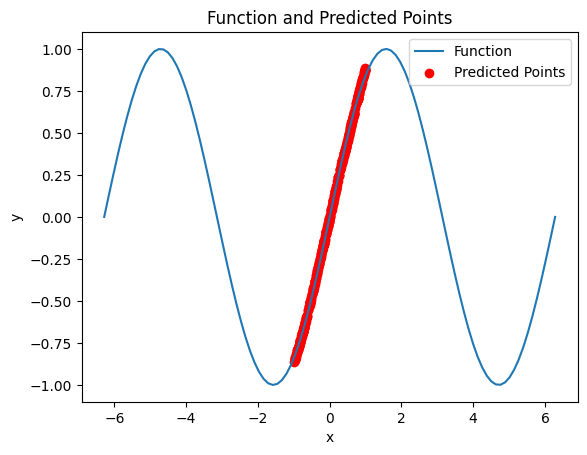

Training with hidden_layers=(100,), max_iter=20, datapoints_number=2000, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.3048217348338656


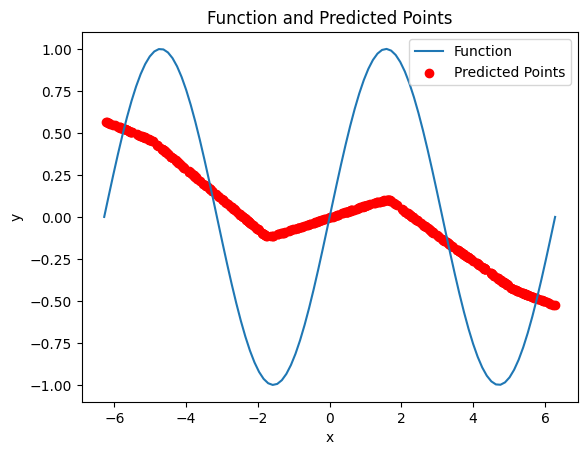

Training with hidden_layers=(100,), max_iter=20, datapoints_number=2000, interval=(0,100)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.47127641622054833


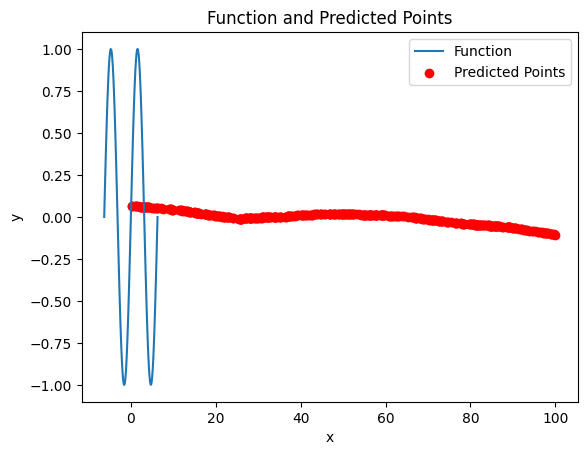

Training with hidden_layers=(100,), max_iter=20, datapoints_number=2000, interval=(-10,10)

Mean Squared Error: 0.4358664682398656


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


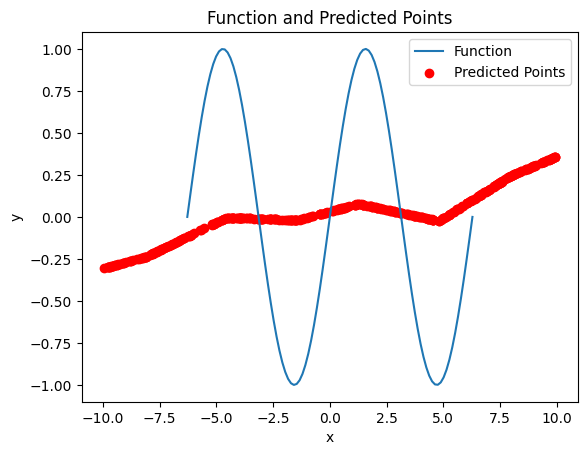

Training with hidden_layers=(100,), max_iter=20, datapoints_number=3000, interval=(0,1)

Mean Squared Error: 5.190055199506961e-06


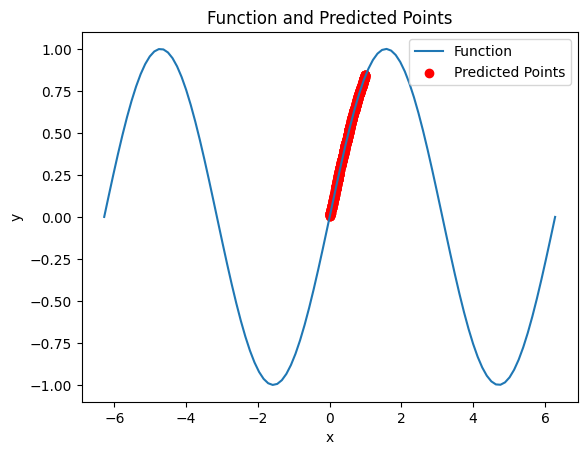

Training with hidden_layers=(100,), max_iter=20, datapoints_number=3000, interval=(-1,1)

Mean Squared Error: 2.845888964713292e-05


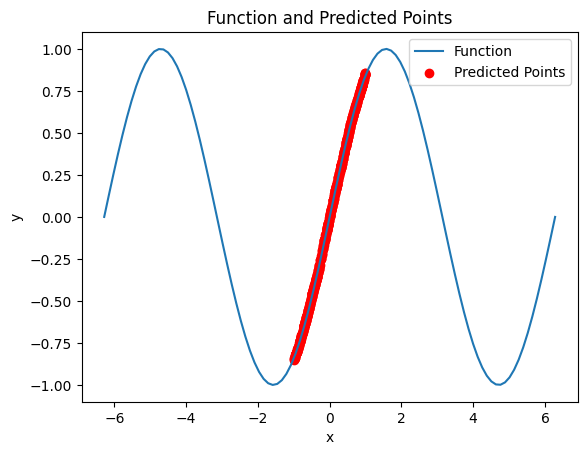

Training with hidden_layers=(100,), max_iter=20, datapoints_number=3000, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.18982754195516297


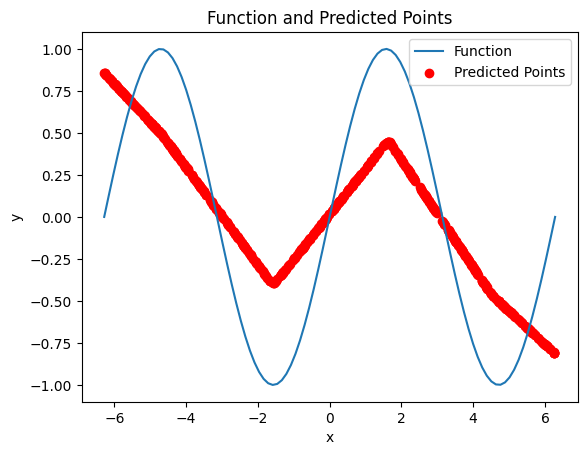

Training with hidden_layers=(100,), max_iter=20, datapoints_number=3000, interval=(0,100)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.5040367089860562


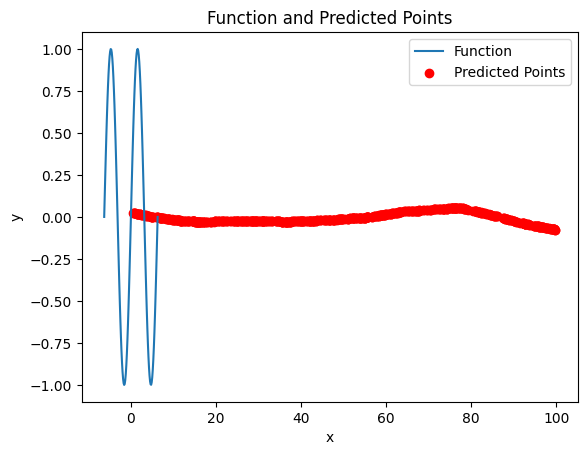

Training with hidden_layers=(100,), max_iter=20, datapoints_number=3000, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.4042094074572559


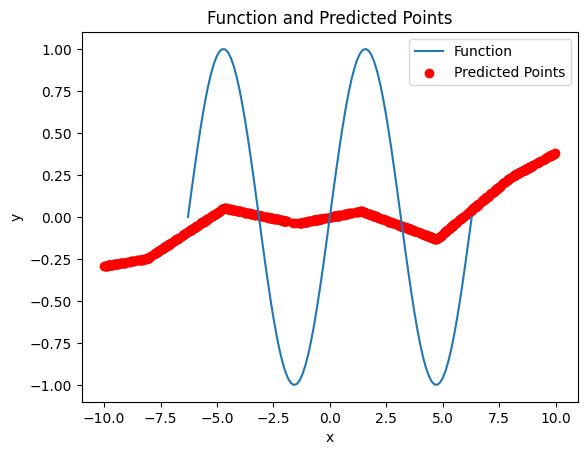

Training with hidden_layers=(100,), max_iter=100, datapoints_number=20, interval=(0,1)

Mean Squared Error: 0.009507175840733163


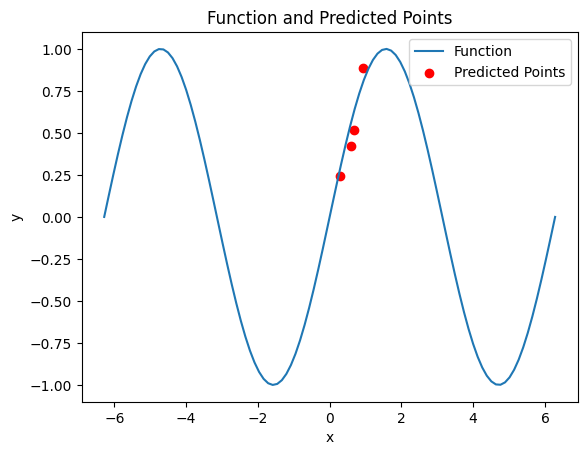

Training with hidden_layers=(100,), max_iter=100, datapoints_number=20, interval=(-1,1)

Mean Squared Error: 0.0005614235668879439


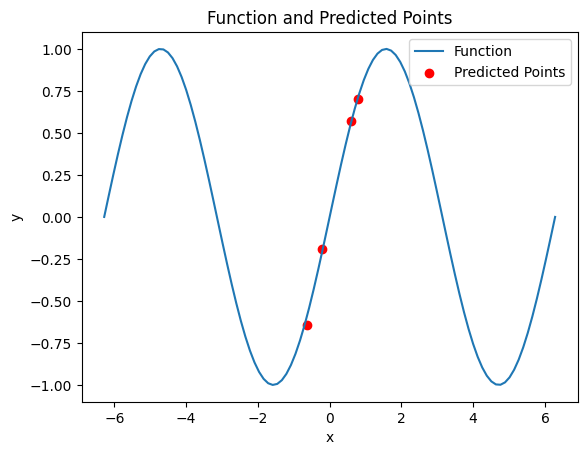

Training with hidden_layers=(100,), max_iter=100, datapoints_number=20, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 1.0700721280148628


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


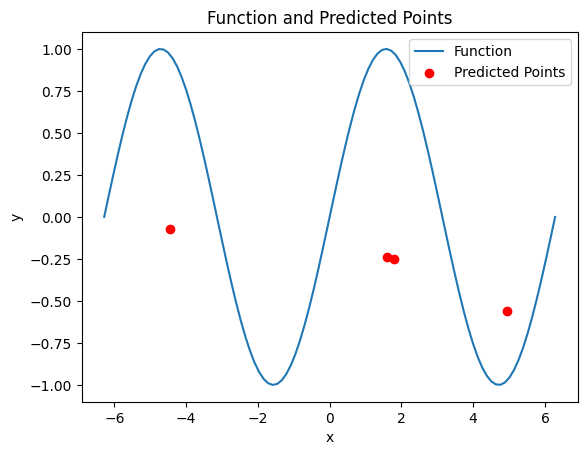

Training with hidden_layers=(100,), max_iter=100, datapoints_number=20, interval=(0,100)

Mean Squared Error: 0.5843768170593313


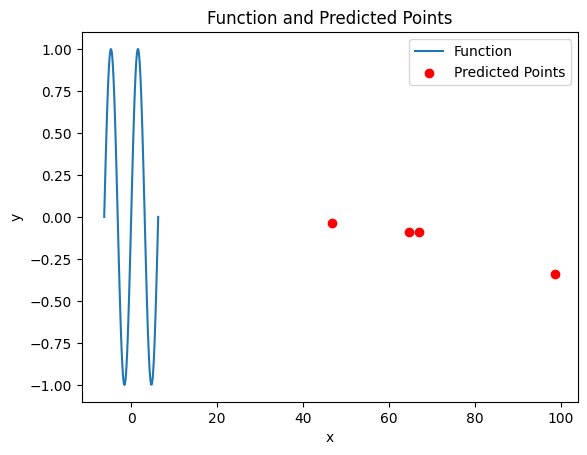

Training with hidden_layers=(100,), max_iter=100, datapoints_number=20, interval=(-10,10)

Mean Squared Error: 0.7594717204938415


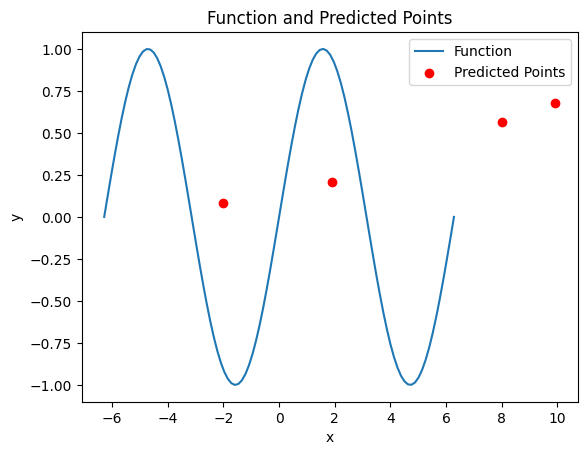

Training with hidden_layers=(100,), max_iter=100, datapoints_number=100, interval=(0,1)

Mean Squared Error: 0.0009345503411966024


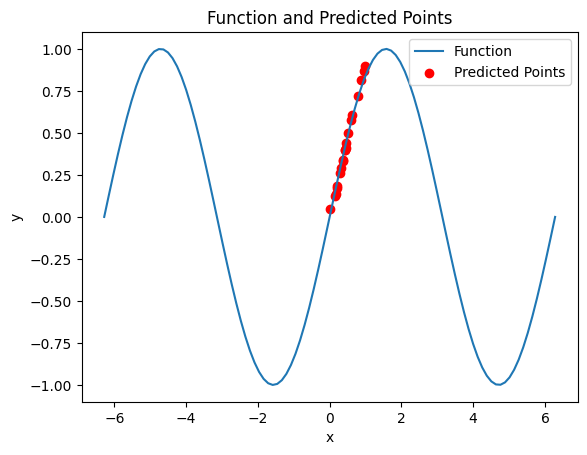

Training with hidden_layers=(100,), max_iter=100, datapoints_number=100, interval=(-1,1)

Mean Squared Error: 0.0012378398160582226


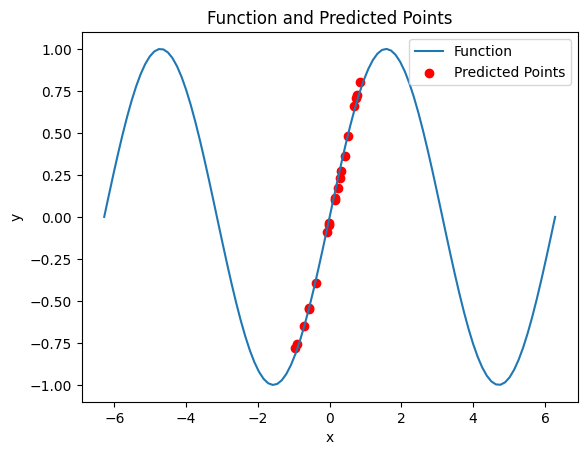

Training with hidden_layers=(100,), max_iter=100, datapoints_number=100, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.23568950016972096


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


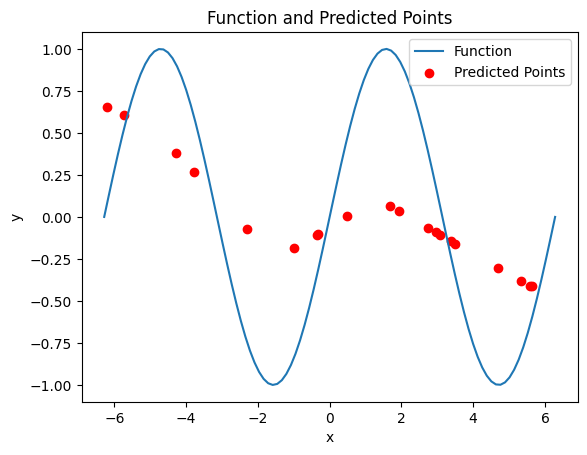

Training with hidden_layers=(100,), max_iter=100, datapoints_number=100, interval=(0,100)

Mean Squared Error: 0.5327820746677093


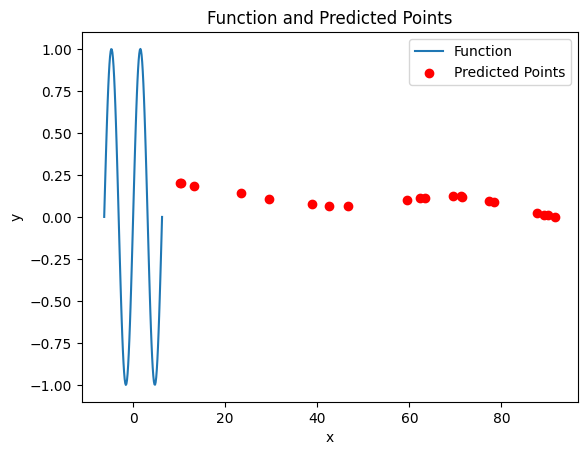

Training with hidden_layers=(100,), max_iter=100, datapoints_number=100, interval=(-10,10)

Mean Squared Error: 0.42149486276084885


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


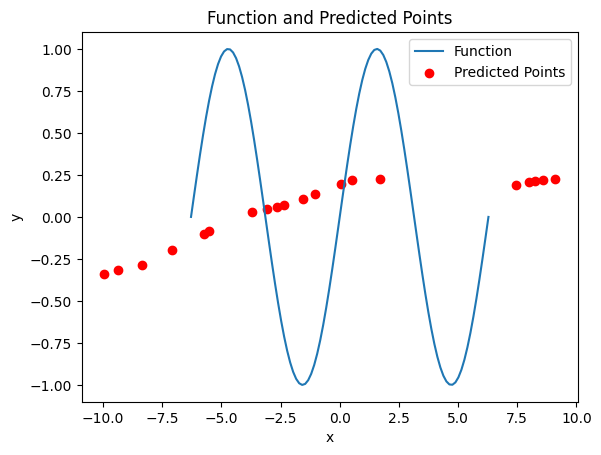

Training with hidden_layers=(100,), max_iter=100, datapoints_number=500, interval=(0,1)

Mean Squared Error: 0.002704687978054454


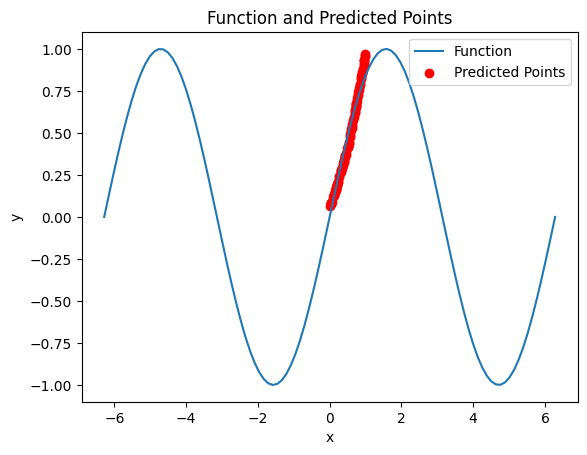

Training with hidden_layers=(100,), max_iter=100, datapoints_number=500, interval=(-1,1)

Mean Squared Error: 0.00027476527034992095


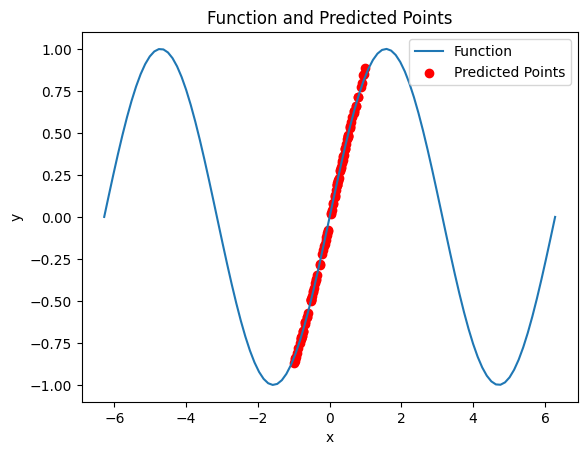

Training with hidden_layers=(100,), max_iter=100, datapoints_number=500, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.21593034788264764


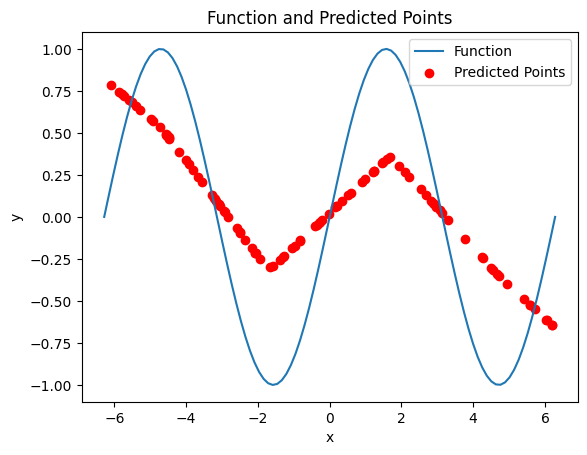

Training with hidden_layers=(100,), max_iter=100, datapoints_number=500, interval=(0,100)

Mean Squared Error: 0.5718028359575157


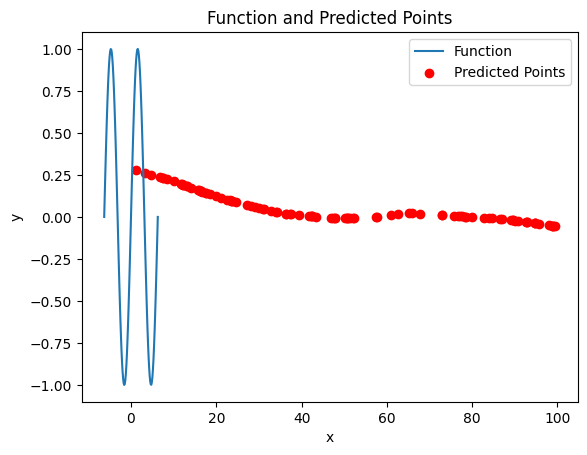

Training with hidden_layers=(100,), max_iter=100, datapoints_number=500, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.3954468244703135


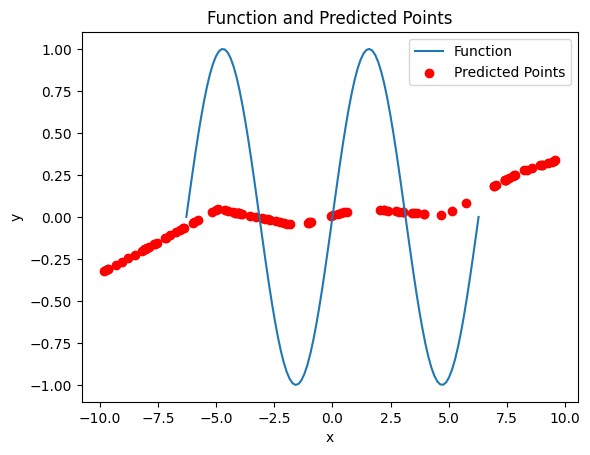

Training with hidden_layers=(100,), max_iter=100, datapoints_number=600, interval=(0,1)

Mean Squared Error: 0.0009038788895234066


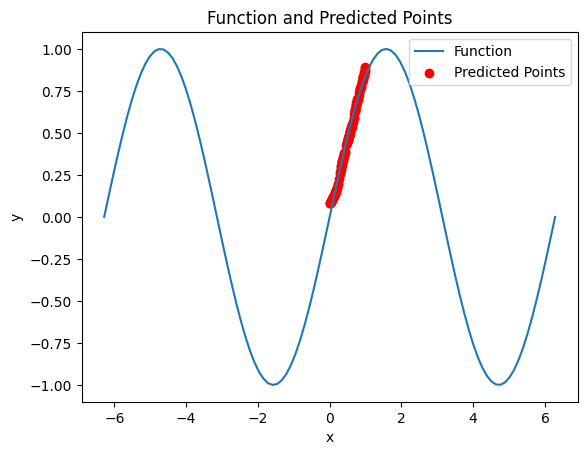

Training with hidden_layers=(100,), max_iter=100, datapoints_number=600, interval=(-1,1)

Mean Squared Error: 8.829246899309934e-05


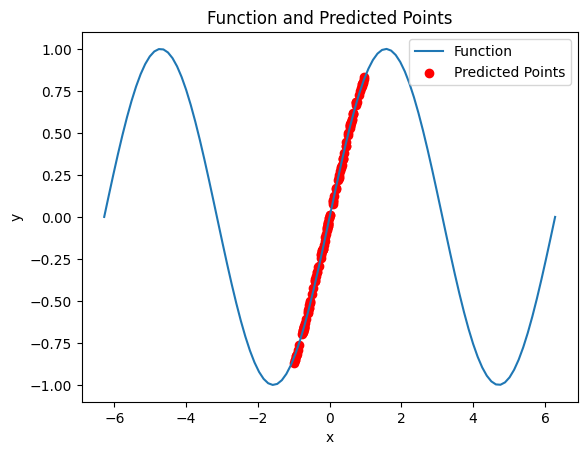

Training with hidden_layers=(100,), max_iter=100, datapoints_number=600, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.18186921454842123


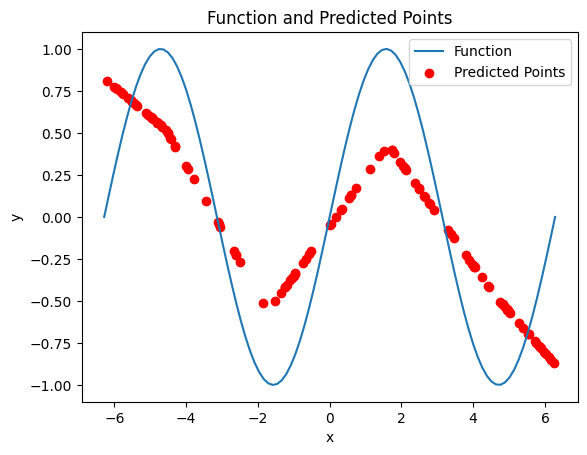

Training with hidden_layers=(100,), max_iter=100, datapoints_number=600, interval=(0,100)

Mean Squared Error: 0.48244814781779083


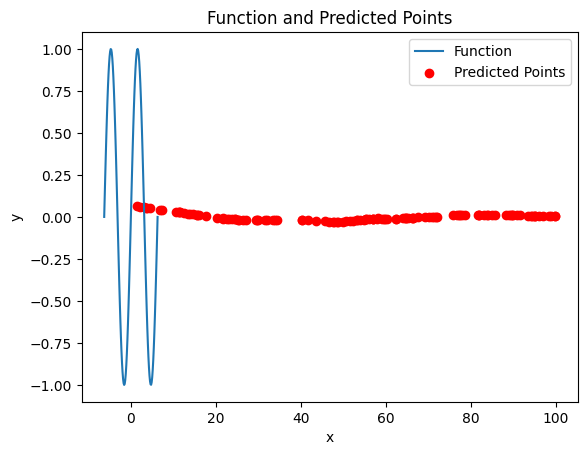

Training with hidden_layers=(100,), max_iter=100, datapoints_number=600, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.39712165831177004


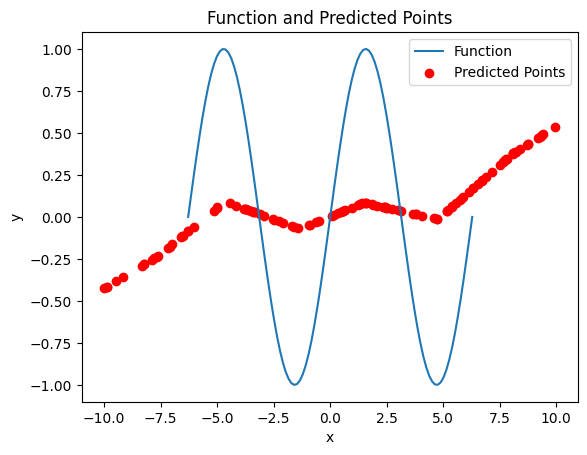

Training with hidden_layers=(100,), max_iter=100, datapoints_number=1000, interval=(0,1)

Mean Squared Error: 0.0004096571328088233


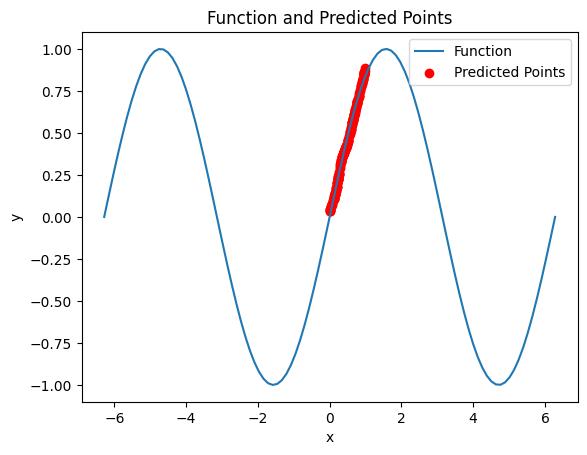

Training with hidden_layers=(100,), max_iter=100, datapoints_number=1000, interval=(-1,1)

Mean Squared Error: 0.00027506224805832623


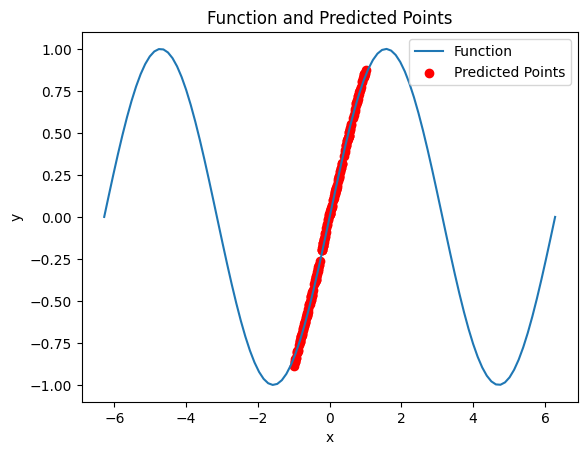

Training with hidden_layers=(100,), max_iter=100, datapoints_number=1000, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.113983161592004


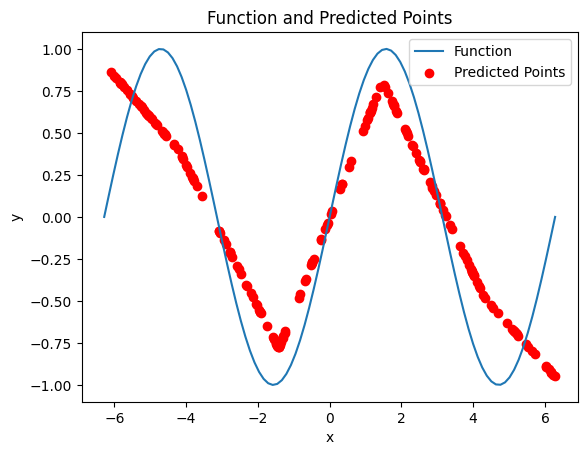

Training with hidden_layers=(100,), max_iter=100, datapoints_number=1000, interval=(0,100)

Mean Squared Error: 0.5133172481814308


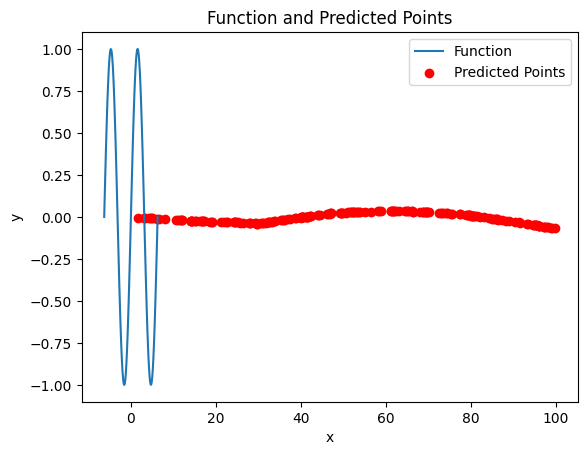

Training with hidden_layers=(100,), max_iter=100, datapoints_number=1000, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.37394842451138927


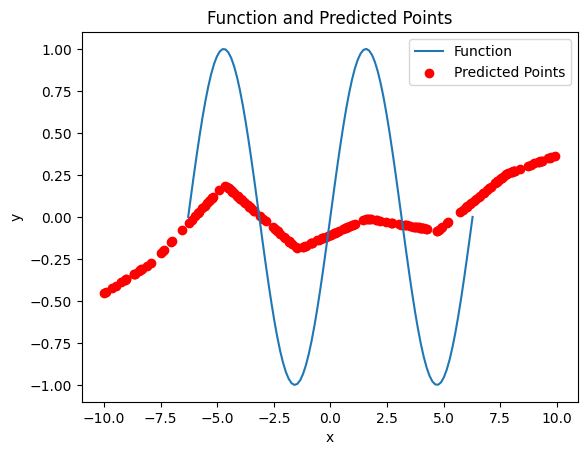

Training with hidden_layers=(100,), max_iter=100, datapoints_number=2000, interval=(0,1)

Mean Squared Error: 1.769067038752985e-05


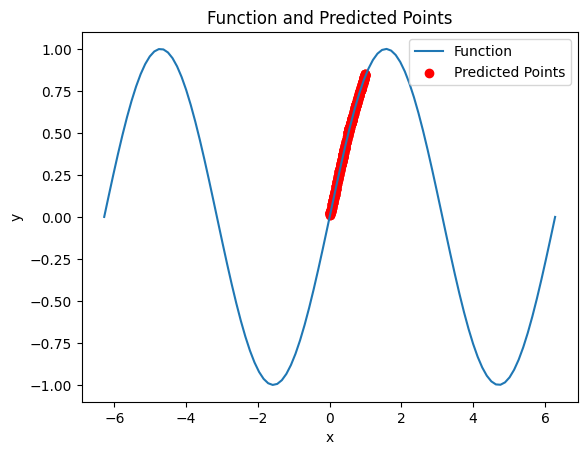

Training with hidden_layers=(100,), max_iter=100, datapoints_number=2000, interval=(-1,1)

Mean Squared Error: 6.766687495919513e-05


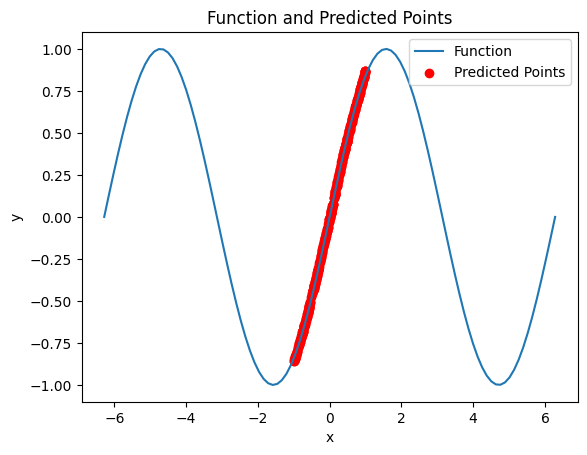

Training with hidden_layers=(100,), max_iter=100, datapoints_number=2000, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.05585874981024659


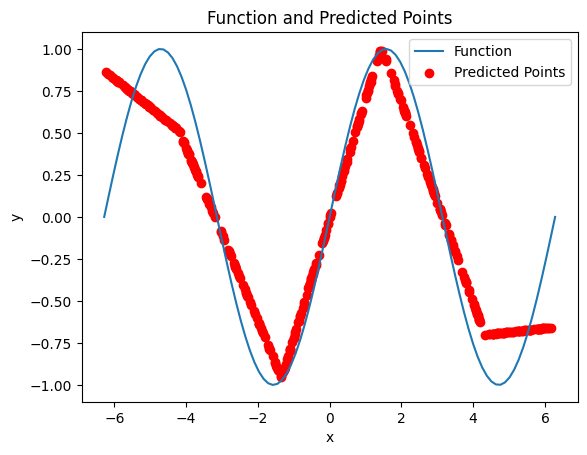

Training with hidden_layers=(100,), max_iter=100, datapoints_number=2000, interval=(0,100)

Mean Squared Error: 0.5270171446924884


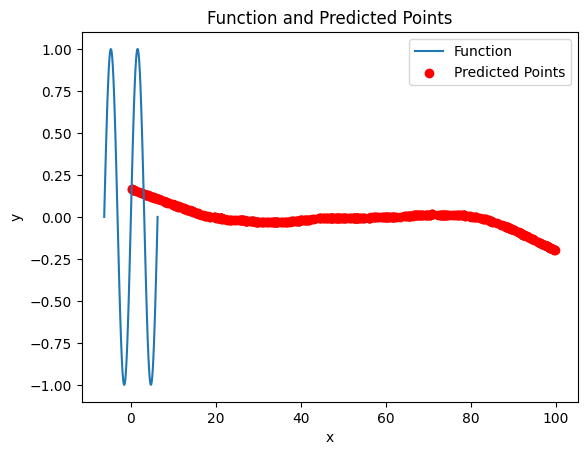

Training with hidden_layers=(100,), max_iter=100, datapoints_number=2000, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.2725978367128109


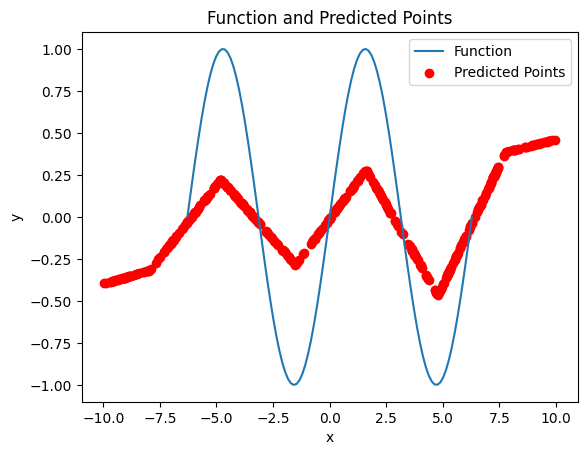

Training with hidden_layers=(100,), max_iter=100, datapoints_number=3000, interval=(0,1)

Mean Squared Error: 5.096646385917315e-05


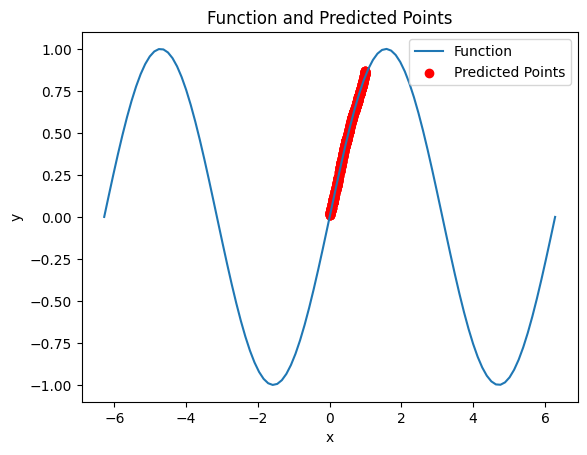

Training with hidden_layers=(100,), max_iter=100, datapoints_number=3000, interval=(-1,1)

Mean Squared Error: 0.0002110374239186464


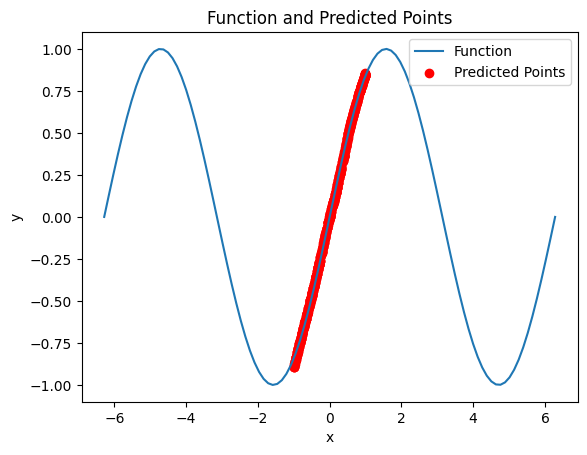

Training with hidden_layers=(100,), max_iter=100, datapoints_number=3000, interval=(-6.283185307179586,6.283185307179586)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.021227895690046086


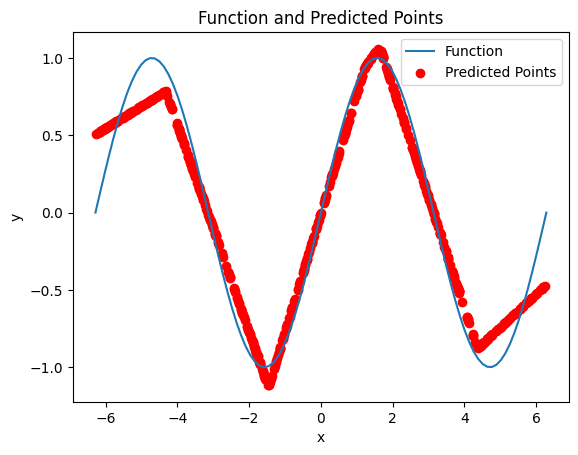

Training with hidden_layers=(100,), max_iter=100, datapoints_number=3000, interval=(0,100)

Mean Squared Error: 0.4898992928879944


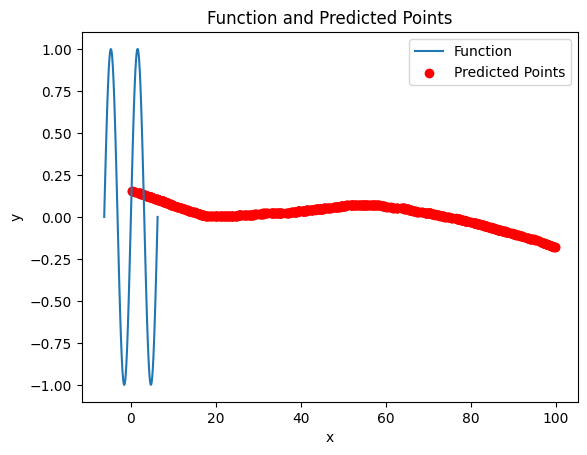

Training with hidden_layers=(100,), max_iter=100, datapoints_number=3000, interval=(-10,10)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error: 0.23935896913867252


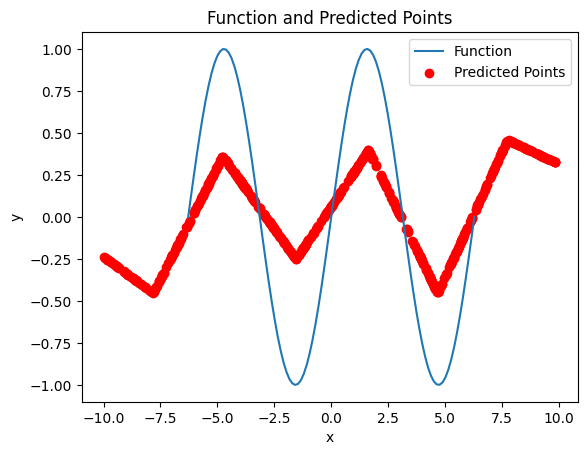

Training with hidden_layers=(100,), max_iter=200, datapoints_number=20, interval=(0,1)

Mean Squared Error: 0.005187008253994062


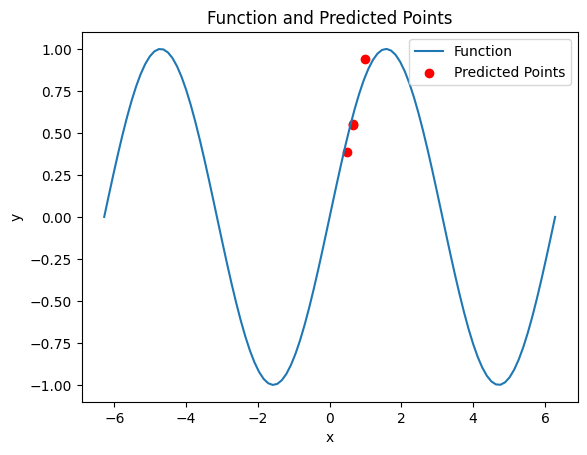

Training with hidden_layers=(100,), max_iter=200, datapoints_number=20, interval=(-1,1)

Mean Squared Error: 0.002726411461741956


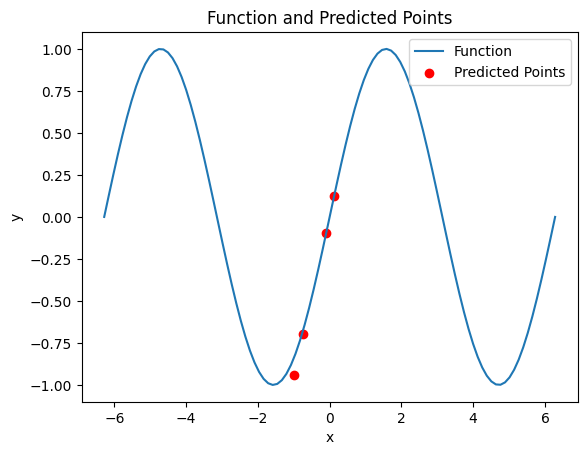

Training with hidden_layers=(100,), max_iter=200, datapoints_number=20, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.3357448945673286


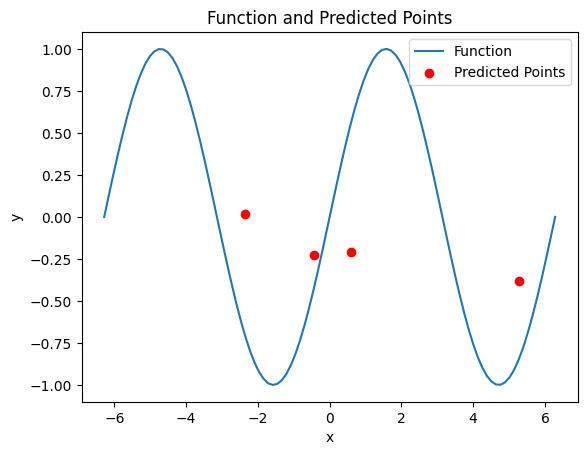

Training with hidden_layers=(100,), max_iter=200, datapoints_number=20, interval=(0,100)

Mean Squared Error: 0.4943689716490428


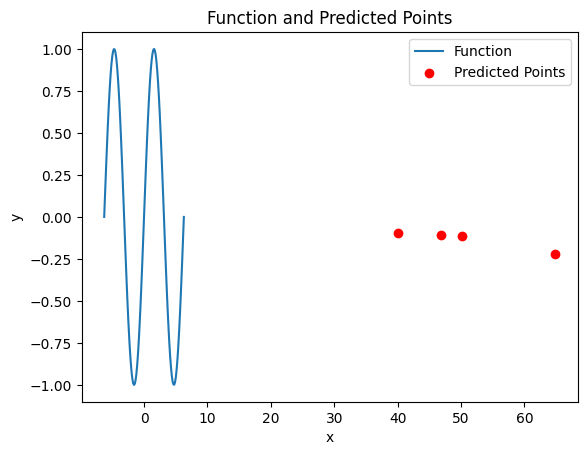

Training with hidden_layers=(100,), max_iter=200, datapoints_number=20, interval=(-10,10)

Mean Squared Error: 0.6897057271367646


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


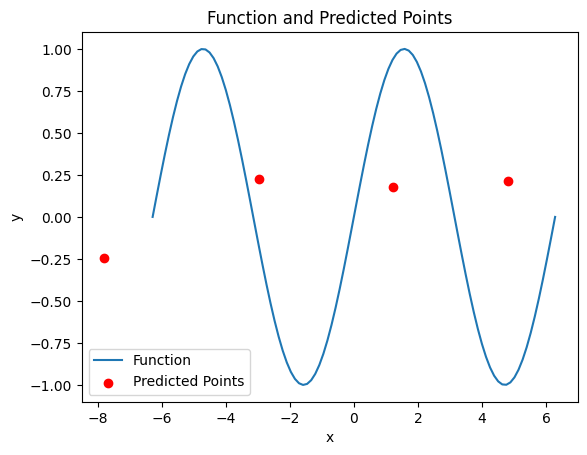

Training with hidden_layers=(100,), max_iter=200, datapoints_number=100, interval=(0,1)

Mean Squared Error: 0.008286746135830548


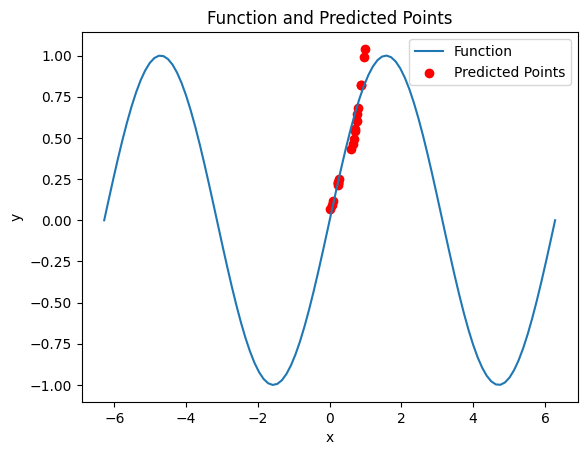

Training with hidden_layers=(100,), max_iter=200, datapoints_number=100, interval=(-1,1)

Mean Squared Error: 0.0016959549364116238


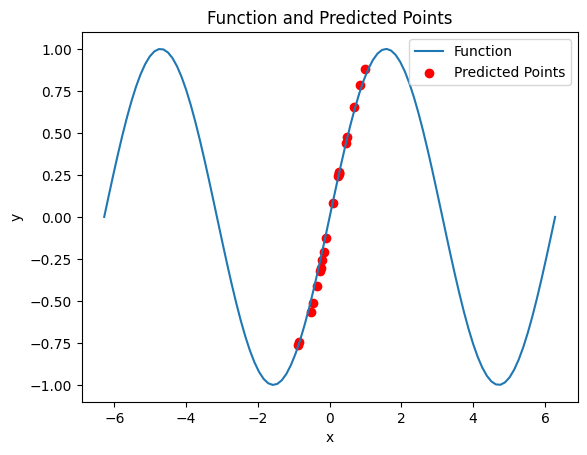

Training with hidden_layers=(100,), max_iter=200, datapoints_number=100, interval=(-6.283185307179586,6.283185307179586)

Mean Squared Error: 0.26869284092513845


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


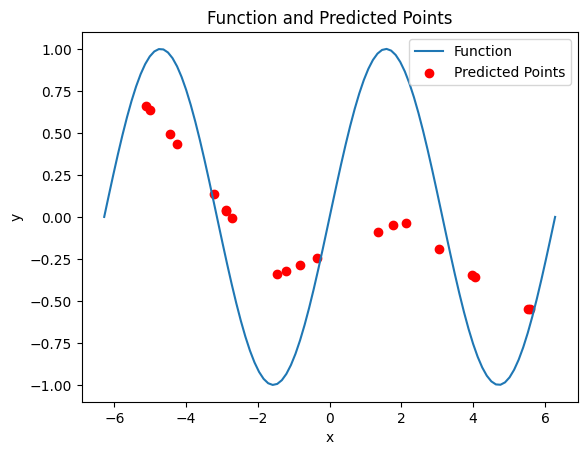

Training with hidden_layers=(100,), max_iter=200, datapoints_number=100, interval=(0,100)

Mean Squared Error: 0.348432215602691


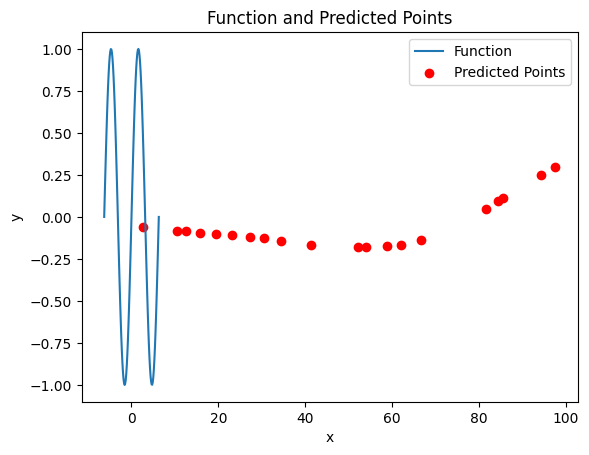

Training with hidden_layers=(100,), max_iter=200, datapoints_number=100, interval=(-10,10)

Mean Squared Error: 0.31971772882746


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


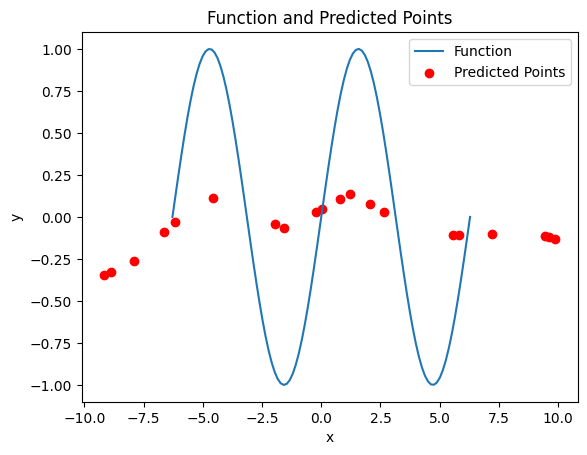

Training with hidden_layers=(100,), max_iter=200, datapoints_number=500, interval=(0,1)

Mean Squared Error: 0.0004462519798349722


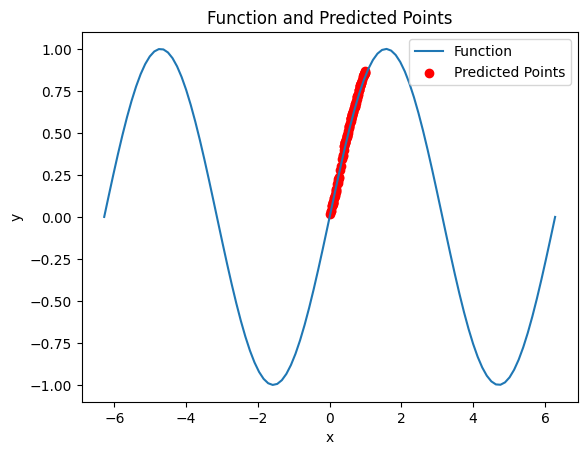

In [ ]:
# Loop over the parameters
for hidden_layers in hidden_layers_list:
    for max_iter in max_iter_list:
        for datapoints_number in datapoints_number_list:
            for start, end in interval:
                print(f"Training with hidden_layers={hidden_layers}, max_iter={max_iter}, datapoints_number={datapoints_number}, interval=({start},{end})")
                train_and_evaluate(np.sin, hidden_layers, max_iter, datapoints_number, start, end)

# Linear function 3*x+5

In [ ]:
# Loop over the parameters
for hidden_layers in hidden_layers_list:
    for max_iter in max_iter_list:
        for datapoints_number in datapoints_number_list:
            for start, end in interval:
                print(f"Training with hidden_layers={hidden_layers}, max_iter={max_iter}, datapoints_number={datapoints_number}, interval=({start},{end})")
                train_and_evaluate(lambda x: 3*x+5, hidden_layers, max_iter, datapoints_number, start, end)

# trigonometric function:np.sin(x)+np.cos(x)**2

In [ ]:
# Loop over the parameters
for hidden_layers in hidden_layers_list:
    for max_iter in max_iter_list:
        for datapoints_number in datapoints_number_list:
            for start, end in interval:
                print(f"Training with hidden_layers={hidden_layers}, max_iter={max_iter}, datapoints_number={datapoints_number}, interval=({start},{end})")
                train_and_evaluate(lambda x:np.sin(x)+np.cos(x)**2 , hidden_layers, max_iter, datapoints_number, start, end)

# add noise

noise_rate=0.5

In [ ]:
 train_and_evaluate_noisy(lambda x:np.sin(x) ,noise_rate=0.5)

noise_rate=0.2

In [ ]:
 train_and_evaluate_noisy(lambda x:np.sin(x) ,noise_rate=0.2)

noise_rate=0.1

In [ ]:
 train_and_evaluate_noisy(lambda x:np.sin(x) ,noise_rate=0.1)

noise_rate=0.9

In [ ]:
 train_and_evaluate_noisy(lambda x:np.sin(x) ,noise_rate=0.9)

noise_rate=1

In [ ]:
 train_and_evaluate_noisy(lambda x:np.sin(x) ,noise_rate=1)

# Quadratic function:3*x**2-5*x-1

In [ ]:
# Loop over the parameters
for hidden_layers in hidden_layers_list:
    for max_iter in max_iter_list:
        for datapoints_number in datapoints_number_list:
            for start, end in interval:
                print(f"Training with hidden_layers={hidden_layers}, max_iter={max_iter}, datapoints_number={datapoints_number}, interval=({start},{end})")
                train_and_evaluate(lambda x:3*x**2-5*x-1 , hidden_layers, max_iter, datapoints_number, start, end)

# Neural Network-Based Prediction of Missing Data Points in a Graph

**create a dataframe**
I used this website: http://www.graphreader.com/ for converting an image to datapoints. my function is:
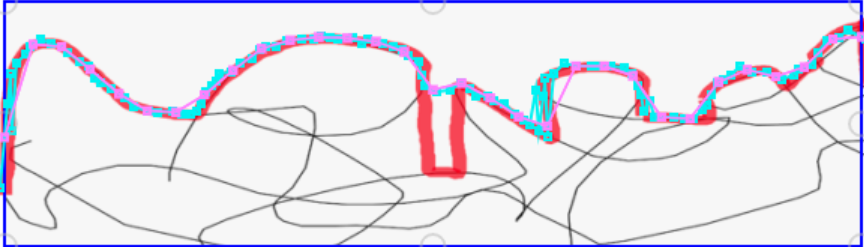

In [ ]:
data={
"x":[-0.184,0.105,0.21,0.263,0.42,0.736,0.893,1.261,1.629,1.996,2.207,2.627,2.942,3.152,3.363,3.73,4.203,4.518,5.044,5.359,5.884,6.2,6.515,6.725,6.883,7.04,7.25,7.408,7.513,7.933,8.249,8.669,8.932,9.142,9.51,9.877,10.403,10.823,11.086,11.401,11.664,12.189,12.504,12.715,13.24,13.608,13.923,14.133,14.501,14.606,14.711,15.131,15.604,15.972,16.287,16.497,16.918,17.128,17.496,17.863,18.179,18.389,18.599,18.704,18.862,18.914,19.019,19.229,19.597,20.018,20.543,20.858,21.226,21.699,21.961,22.172,22.277,22.382,22.592,22.75,23.433,23.8,24.116,24.431,24.588,24.746,24.956,25.166,25.429,25.744,26.165,26.69,27.215,27.636,27.793,28.266,28.476,28.792,29.212,29.527,30.158,30.289],
"y":[2.393,5.828,7.055,4.724,7.485,7.853,8.16,8.466,8.282,8.16,7.914,7.546,7.362,6.871,6.687,6.442,6.074,5.706,5.521,5.46,5.521,5.399,5.399,5.521,5.828,6.319,6.564,6.748,7.055,7.117,7.485,7.669,8.037,8.16,8.16,8.405,8.466,8.466,8.589,8.528,8.466,8.528,8.282,8.466,8.282,8.16,8.037,7.791,7.546,6.994,6.564,6.319,6.38,6.687,6.442,6.135,6.135,5.951,5.828,5.399,5.153,4.969,6.38,4.724,6.135,6.871,4.479,7.055,7.485,7.362,7.362,7.362,7.362,7.301,7.055,6.564,6.196,5.521,5.951,5.276,5.276,5.215,5.215,5.583,5.767,6.196,6.687,6.81,6.994,7.362,7.117,7.117,6.81,6.994,7.239,7.423,7.914,8.405,8.528,8.834,8.466,7.423]
}

random_function=pd.DataFrame(data)
random_function

x      y
0    -0.184  2.393
1     0.105  5.828
2     0.210  7.055
3     0.263  4.724
4     0.420  7.485
..      ...    ...
97   28.792  8.405
98   29.212  8.528
99   29.527  8.834
100  30.158  8.466
101  30.289  7.423

[102 rows x 2 columns]

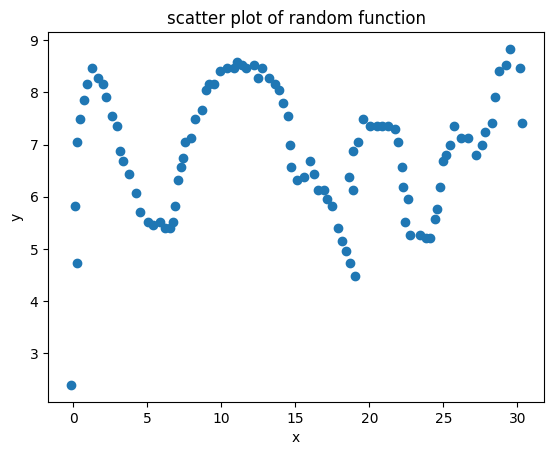

In [ ]:
plt.scatter(random_function['x'],random_function['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot of random function')
plt.show()

In [ ]:
X=random_function[['x']]
y=random_function[['y']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 It is a simple model with a single, fully connected hidden layer with the same number of neurons as input attributes(1)
 The network uses good practices such as the rectifier activation function for the hidden layer. No activation function is used for the output layer because it is a regression problem, and you are interested in predicting numerical values directly without transformation.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
#1, 1, 2, 3, 5, 8, 13, 21, 34, 55
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(8,input_dim=1, kernel_initializer='normal', activation='relu'),
    Dense(13, kernel_initializer='normal', activation='relu'),
    Dense(21, kernel_initializer='normal', activation='relu'),
    Dense(34, kernel_initializer='normal', activation='relu'),
    Dense(55, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal',activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
# loss function

model.compile(
    loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error']
)
# train the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=10,
)

Epoch 1/20
9/9 [==============================] - 1s 3ms/step - loss: 47.4978 - mean_squared_error: 47.4978
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 47.1968 - mean_squared_error: 47.1968
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 46.7228 - mean_squared_error: 46.7228
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 45.8453 - mean_squared_error: 45.8453
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 44.0571 - mean_squared_error: 44.0571
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 40.1271 - mean_squared_error: 40.1271
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 32.2721 - mean_squared_error: 32.2721
Epoch 8/20
9/9 [==============================] - 0s 4ms/step - loss: 19.3914 - mean_squared_error: 19.3914
Epoch 9/20
9/9 [==============================] - 0s 3ms/step - loss: 8.4733 - mean_squared_error: 8.4733
Epoch 10/20
9/9 [=============

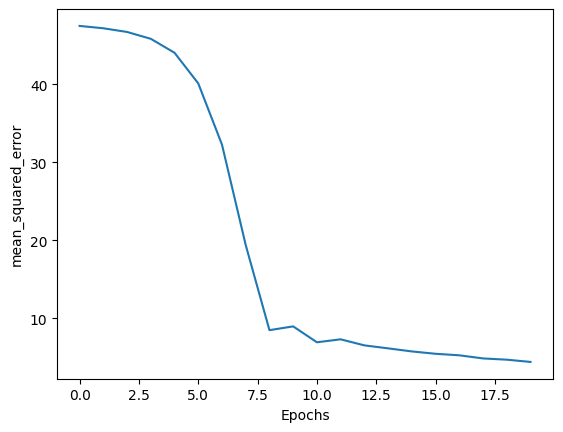

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [ ]:
prediction = model.predict(X_test)

1/1 [==============================] - 0s 86ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(y_test, prediction)

print("Mean Squared Error on test set: ", mse)


Mean Squared Error on test set:  4.976234242929861


In [ ]:
from sklearn.metrics import r2_score

# Assuming 'prediction' is the output of model.predict(X_test)
r2 = r2_score(y_test, prediction)

print("R-squared (R² score): ", r2)

R-squared (R² score):  -1.5303245647103685


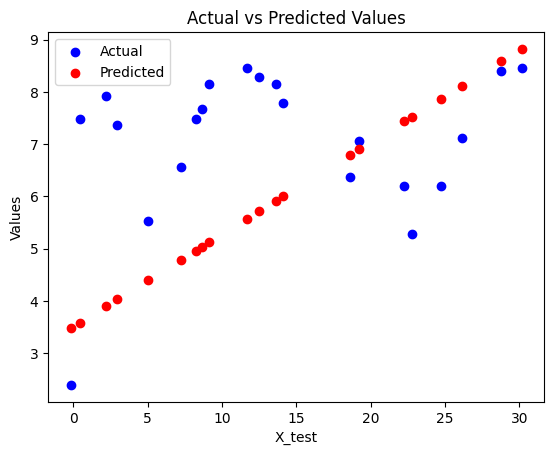

In [ ]:
# Convert y_test and prediction to 1D arrays
y_test_array = y_test.values.flatten()
prediction_array = prediction.flatten()

# Create a scatter plot for actual y_test values
plt.scatter(X_test, y_test_array, color='blue', label='Actual')

# Create a scatter plot for predicted values
plt.scatter(X_test, prediction_array, color='red', label='Predicted')

# Add labels and title
plt.xlabel('X_test')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


**Using k-fold**

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 48.6889 - mean_squared_error: 48.6889
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 48.2882 - mean_squared_error: 48.2882
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 47.6080 - mean_squared_error: 47.6080
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 46.3010 - mean_squared_error: 46.3010
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 43.4517 - mean_squared_error: 43.4517
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 36.9014 - mean_squared_error: 36.9014
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 24.1580 - mean_squared_error: 24.1580
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 8.5929 - mean_squared_error: 8.5929
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 7.4100 - mean_squared_error: 7.4100
Epoch 10/20
10

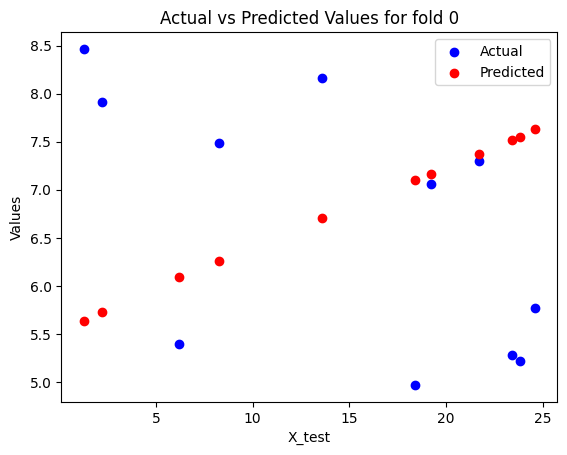

Epoch 1/20
10/10 [==============================] - 1s 5ms/step - loss: 48.1539 - mean_squared_error: 48.1539
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 47.8191 - mean_squared_error: 47.8191
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 47.2912 - mean_squared_error: 47.2912
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 46.2903 - mean_squared_error: 46.2903
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 44.0984 - mean_squared_error: 44.0984
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 39.1064 - mean_squared_error: 39.1064
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 29.0376 - mean_squared_error: 29.0376
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 14.5179 - mean_squared_error: 14.5179
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 9.1523 - mean_squared_error: 9.1523
Epoch 10/20


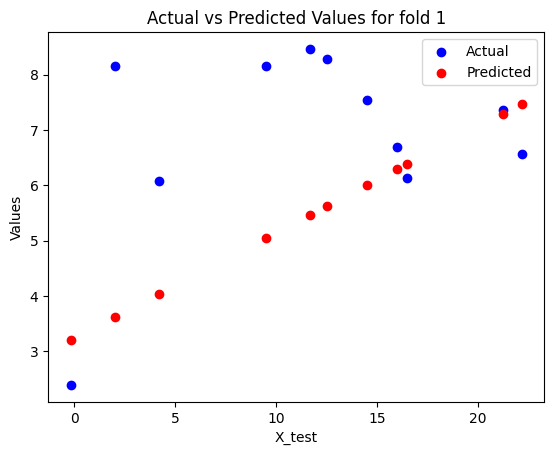

Epoch 1/20
10/10 [==============================] - 2s 4ms/step - loss: 47.9546 - mean_squared_error: 47.9546
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 47.5226 - mean_squared_error: 47.5226
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 46.7487 - mean_squared_error: 46.7487
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 45.2025 - mean_squared_error: 45.2025
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 41.8162 - mean_squared_error: 41.8162
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 34.6445 - mean_squared_error: 34.6445
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 21.3723 - mean_squared_error: 21.3723
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 8.5931 - mean_squared_error: 8.5931
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 9.1310 - mean_squared_error: 9.1310
Epoch 10/20
10

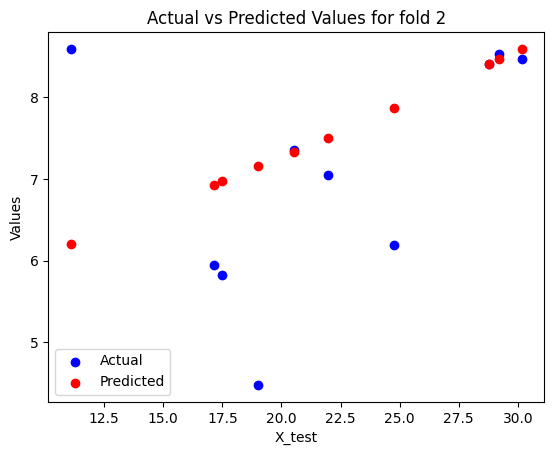

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 48.2351 - mean_squared_error: 48.2351
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 47.9002 - mean_squared_error: 47.9002
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 47.2621 - mean_squared_error: 47.2621
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 45.6933 - mean_squared_error: 45.6933
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 41.5536 - mean_squared_error: 41.5536
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 31.4334 - mean_squared_error: 31.4334
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 14.7303 - mean_squared_error: 14.7303
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 11.3181 - mean_squared_error: 11.3181
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 9.3203 - mean_squared_error: 9.3203
Epoch 10/20


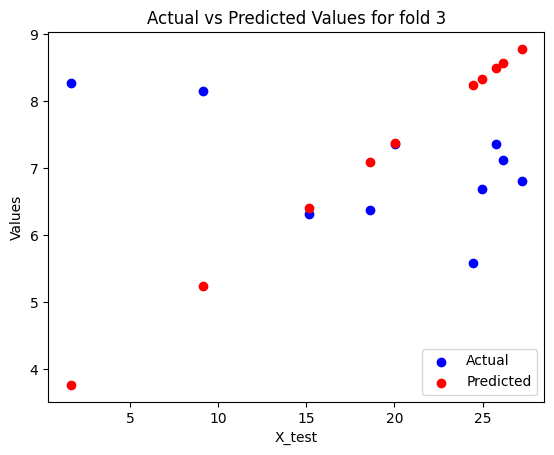

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 49.2055 - mean_squared_error: 49.2055
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 48.8424 - mean_squared_error: 48.8424
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 48.2305 - mean_squared_error: 48.2305
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 47.0889 - mean_squared_error: 47.0889
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 44.6372 - mean_squared_error: 44.6372
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 39.0870 - mean_squared_error: 39.0870
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 27.0086 - mean_squared_error: 27.0086
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 10.0445 - mean_squared_error: 10.0445
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 7.0717 - mean_squared_error: 7.0717
Epoch 10/20


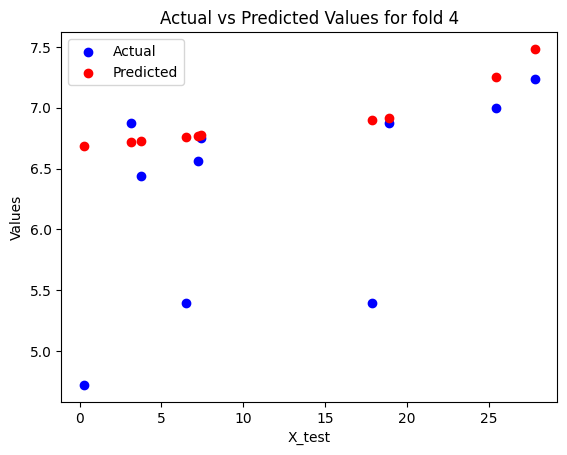

Epoch 1/20
10/10 [==============================] - 2s 6ms/step - loss: 47.9320 - mean_squared_error: 47.9320
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 47.5269 - mean_squared_error: 47.5269
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 46.8193 - mean_squared_error: 46.8193
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 45.4286 - mean_squared_error: 45.4286
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 42.3790 - mean_squared_error: 42.3790
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 35.7582 - mean_squared_error: 35.7582
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 23.0696 - mean_squared_error: 23.0696
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 8.9388 - mean_squared_error: 8.9388
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 7.6589 - mean_squared_error: 7.6589
Epoch 10/20
10

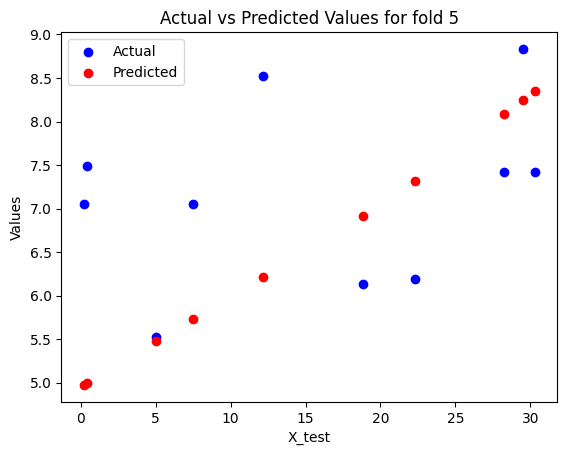

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 47.4295 - mean_squared_error: 47.4295
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 46.9671 - mean_squared_error: 46.9671
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 46.2233 - mean_squared_error: 46.2233
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 44.8615 - mean_squared_error: 44.8615
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 42.3503 - mean_squared_error: 42.3503
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 37.4058 - mean_squared_error: 37.4058
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 28.6621 - mean_squared_error: 28.6621
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 15.4343 - mean_squared_error: 15.4343
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 8.0785 - mean_squared_error: 8.0785
Epoch 10/20


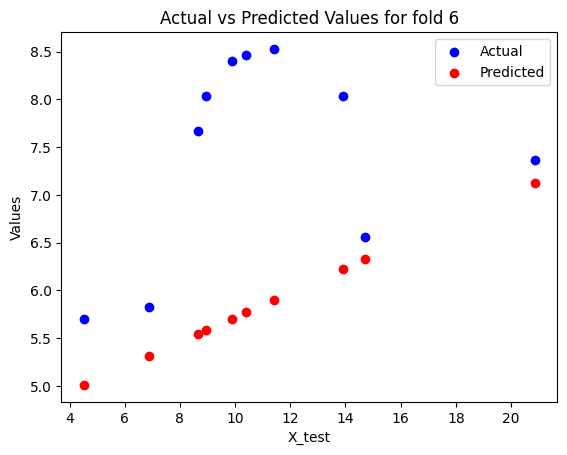

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 48.5650 - mean_squared_error: 48.5650
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 48.1236 - mean_squared_error: 48.1236
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 47.3227 - mean_squared_error: 47.3227
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 45.5496 - mean_squared_error: 45.5496
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 41.3720 - mean_squared_error: 41.3720
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 31.5071 - mean_squared_error: 31.5071
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 14.8785 - mean_squared_error: 14.8785
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 10.1668 - mean_squared_error: 10.1668
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 8.4645 - mean_squared_error: 8.4645
Epoch 10/20


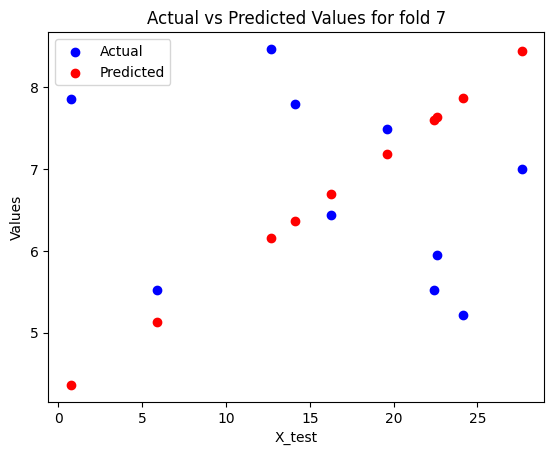

Epoch 1/20
10/10 [==============================] - 1s 3ms/step - loss: 48.6182 - mean_squared_error: 48.6182
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 48.2889 - mean_squared_error: 48.2889
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 47.7055 - mean_squared_error: 47.7055
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 46.5489 - mean_squared_error: 46.5489
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 43.9963 - mean_squared_error: 43.9963
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 38.2870 - mean_squared_error: 38.2870
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 26.9869 - mean_squared_error: 26.9869
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 12.1549 - mean_squared_error: 12.1549
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 9.4648 - mean_squared_error: 9.4648
Epoch 10/20


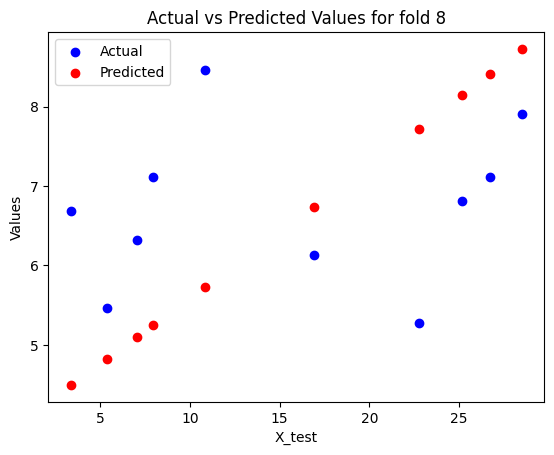

Epoch 1/20
10/10 [==============================] - 2s 7ms/step - loss: 48.7479 - mean_squared_error: 48.7479
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 48.3834 - mean_squared_error: 48.3834
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 47.7716 - mean_squared_error: 47.7716
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 46.6566 - mean_squared_error: 46.6566
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 44.4016 - mean_squared_error: 44.4016
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 39.8480 - mean_squared_error: 39.8480
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 30.5617 - mean_squared_error: 30.5617
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 16.2554 - mean_squared_error: 16.2554
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 6.1849 - mean_squared_error: 6.1849
Epoch 10/20


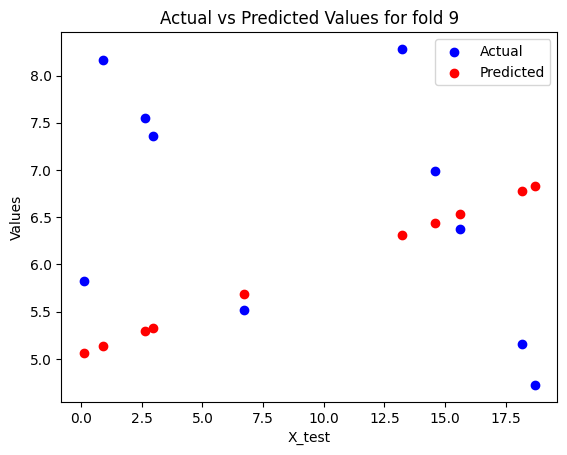

306.48% (+/- 119.53%)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# define 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True)

X=X.values
y=y.values
fold = 0
cvscores = []
for train, test in kfold.split(X, y):
  # create model
  model = build_model_using_sequential()
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  # Fit the model
  model.fit(X[train], y[train], epochs=20, batch_size=10, verbose=1)
  # evaluate the model
  scores = model.evaluate(X[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
   # Make predictions
  predictions = model.predict(X[test])

  # Plot actual vs predicted values
  plt.figure(fold)
  plt.scatter(X[test], y[test], color='blue', label='Actual')
  plt.scatter(X[test], predictions, color='red', label='Predicted')
  plt.xlabel('X_test')
  plt.ylabel('Values')
  plt.title('Actual vs Predicted Values for fold {}'.format(fold))
  plt.legend()
  plt.show()

  fold += 1

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
